### Data Cleaning and Basic Model Testing on the Trips Data, with some elements of the approach for the stop-by-stop data
- This file was essentially a practice notebook to run data cleaning operations and some basic modelling on the trips data,  preparing operations and gaining data insights for the final data we would prepare later.
- Some operations were run to assess feature importance and introduce new features
- There is a small section that transposes some of the previous cleaning operations onto the merged data set for the 46a as well as a few additional operations, specific to the stop-by-stop data. (*these are also included in the 2.2_analysing_of_46a_merged_file_and_cleaning_method_testing notebook*)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
cd tmp

/home/team9/tmp


In [3]:
ls

data/


In [4]:

cd data

/home/team9/tmp/data


In [5]:
ls

Custom_location_53_345035_-6_267261_62b5c8e6c91d98000ba01ceb.csv
rt_leavetimes_DB_2018.txt
rt_trips_DB_2018.txt
rt_vehicles_DB_2018.txt
rt_vehicles_DB_2018.zip
test_46a_dask.csv
trips_modelling.csv
weather_factorised.csv
weather_trips.csv


In [6]:
trips = pd.read_csv('rt_trips_DB_2018.txt', sep=";", parse_dates=[1])


In [7]:
weather_trips = pd.read_csv('weather_trips.csv')

In [8]:
weather_trips

,Unnamed: 0,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon
0,0,1483228800,5.39,9999.0,5.10,Rain,moderate rain,10n
1,1,1483232400,5.39,9999.0,4.10,Rain,moderate rain,10n
2,2,1483236000,5.39,9999.0,4.10,Rain,light rain,10n
3,3,1483239600,4.39,9999.0,6.20,Rain,light rain,10n
4,4,1483243200,4.39,9999.0,6.20,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...
26275,26275,1577818800,9.33,9999.0,0.45,Clouds,broken clouds,04n
26276,26276,1577822400,8.81,9999.0,3.10,Clouds,overcast clouds,04n
26277,26277,1577826000,7.86,9999.0,0.45,Clouds,overcast clouds,04n
26278,26278,1577829600,7.49,9999.0,0.45,Clouds,broken clouds,04n


In [9]:
weather_trips = weather_trips.drop(columns=["Unnamed: 0"])


In [10]:
weather_trips.head(3)

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon
0,1483228800,5.39,9999.0,5.1,Rain,moderate rain,10n
1,1483232400,5.39,9999.0,4.1,Rain,moderate rain,10n
2,1483236000,5.39,9999.0,4.1,Rain,light rain,10n


In [11]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,"


In [12]:
trips.describe()

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TENDERLOT,SUPPRESSED,JUSTIFICATIONID
count,2.182637e+06,2.182637e+06,2.182637e+06,2.182637e+06,2.045430e+06,2.018086e+06,0.0,4333.0,4330.000000
mean,7.149479e+06,1.504103e+00,5.507875e+04,5.153329e+04,5.506239e+04,5.170612e+04,NaN,0.0,237554.867667
std,7.314423e+05,4.999833e-01,1.742482e+04,1.757164e+04,1.733870e+04,1.752695e+04,NaN,0.0,34585.051789
min,5.955221e+06,1.000000e+00,1.820300e+04,1.620000e+04,1.754600e+04,1.597400e+04,NaN,0.0,177856.000000
25%,6.592584e+06,1.000000e+00,3.968300e+04,3.600000e+04,3.966800e+04,3.651800e+04,NaN,0.0,205506.500000
50%,7.110090e+06,2.000000e+00,5.527600e+04,5.160000e+04,5.518900e+04,5.161800e+04,NaN,0.0,233851.500000
75%,8.018241e+06,2.000000e+00,6.900600e+04,6.516000e+04,6.901900e+04,6.539800e+04,NaN,0.0,271506.750000
max,8.592207e+06,2.000000e+00,9.168000e+04,8.760000e+04,9.437800e+04,9.717700e+04,NaN,0.0,297899.000000


In [13]:
haveDepTime = trips[trips["ACTUALTIME_DEP"].notnull()]
haveDep_ArrTime = haveDepTime[haveDepTime["ACTUALTIME_ARR"].notnull()]
haveDep_ArrTime

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,DB,2018-05-14,6765652,53,53_21,2,30626,29100,30482.0,29119.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024762,"
2182630,DB,2018-05-14,6765662,53,53_21,2,65950,64800,66270.0,64815.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024821,"
2182631,DB,2018-05-14,6765828,45A,45A_68,1,28647,25800,28688.0,25858.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2448734,"
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"


In [14]:
print(trips.shape[0] - haveDep_ArrTime.shape[0], 'trips are missing either actual departure or arrival times')

289270 trips are missing either actual departure or arrival times


In [15]:
trips.nunique()

DATASOURCE              1
DAYOFSERVICE          360
TRIPID             658964
LINEID                130
ROUTEID               588
DIRECTION               2
PLANNEDTIME_ARR     64461
PLANNEDTIME_DEP       791
ACTUALTIME_ARR      68122
ACTUALTIME_DEP      66771
BASIN                   1
TENDERLOT               0
SUPPRESSED              1
JUSTIFICATIONID      3526
LASTUPDATE            360
NOTE                46690
dtype: int64

- 360 days of service - seems to be one for every day
- only 650k trip IDs but over 2 million lines - need to see why 

In [16]:
trips.loc[trips['TRIPID']==6765486]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
470885,DB,2018-05-17,6765486,33D,33D_62,2,29460,26400,30676.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:42:42,",3077688,"
2071391,DB,2018-05-18,6765486,33D,33D_62,2,29460,26400,29846.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:52:33,",3077688,"
2172425,DB,2018-05-16,6765486,33D,33D_62,2,29460,26400,30102.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:32:53,",3077688,"
2179562,DB,2018-05-15,6765486,33D,33D_62,2,29460,26400,30403.0,26416.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",3077688,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"


Looks like the trip IDs are sometimes duplicated but on different days. Need to see if they are ever duplicated on the same day

In [17]:
sub_trips = trips[["DAYOFSERVICE", "TRIPID"]]

In [18]:
print(sub_trips.duplicated().sum(), "duplicated trip IDs on the same day.")

0 duplicated trip IDs on the same day.


Therefore trip ID is never reused on the same day.
- Can use it and day as a unique identifier

In [19]:
trips.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
ROUTEID                    object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                      object
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE                 object
NOTE                       object
dtype: object

Next I will convert the dates to days of the week

In [20]:
trips['DAYOFWEEK'] = trips['DAYOFSERVICE'].dt.weekday

In [21]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",2
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",2
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",2
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",2
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,",0
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,",0
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,",0
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,",0


Next I will determine the hour of departure for the trip and the travel time

In [22]:
# dividing by seconds and minutes
trips['HOUR_DEPARTURE'] = trips['ACTUALTIME_DEP'].apply(lambda row: row//3600)

In [23]:
# getting arrival time minus departure, then dividing by 60 seconds
trips['JOURNEY_TIME'] = (trips['ACTUALTIME_ARR'] - trips['ACTUALTIME_DEP']).apply(lambda row: row/60)

In [24]:
trips['JOURNEY_TIME'].describe()

count    1.893367e+06
mean     6.422932e+01
std      2.391304e+01
min     -2.477667e+02
25%      4.671667e+01
50%      6.286667e+01
75%      8.075000e+01
max      3.909667e+02
Name: JOURNEY_TIME, dtype: float64

Not sure why there would be a negative - will investigate

In [25]:
trips.loc[trips['JOURNEY_TIME']<10]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
505,DB,2018-09-26,7773427,185,185_57,2,43034,42600,43213.0,42640.0,BasDef,NaN,NaN,NaN,18-OCT-18 18:01:47,",2817941,",2,11.0,9.550000
506,DB,2018-09-26,7773423,185,185_57,2,38234,37800,38349.0,37836.0,BasDef,NaN,NaN,NaN,18-OCT-18 18:01:47,",2817937,",2,10.0,8.550000
1619,DB,2018-06-21,7029435,150,150_8,1,75653,73800,76232.0,83371.0,BasDef,NaN,NaN,NaN,29-JUN-18 15:43:00,",2961346,2961346,",3,23.0,-118.983333
2055,DB,2018-04-11,6627695,185,185_63,2,86179,85500,85696.0,85175.0,BasDef,NaN,NaN,NaN,20-APR-18 14:41:36,",2818175,",2,23.0,8.683333
2583,DB,2018-06-26,7108408,185,185_57,2,57022,56400,56905.0,56308.0,BasDef,NaN,NaN,NaN,04-JUL-18 12:21:00,",2817949,",1,15.0,9.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180303,DB,2018-05-15,6767407,185,185_57,2,38267,37800,38330.0,37819.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",2817937,",1,10.0,8.516667
2180307,DB,2018-05-15,6767414,185,185_51,1,46725,46200,46752.0,46246.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",2817944,",1,12.0,8.433333
2181507,DB,2018-05-15,6763783,33A,33A_27,2,84040,83700,83992.0,83603.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",1734809,",1,23.0,6.483333
2181635,DB,2018-05-15,6766458,46A,46A_73,1,85288,84600,85087.0,84600.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",3067060,",1,23.0,8.116667


Seems as though these rows should be dropped

In [26]:
trips = trips.loc[trips['JOURNEY_TIME']>0]

In [27]:
shorts = trips.loc[trips['JOURNEY_TIME']<10]

In [28]:
shorts.nunique()

DATASOURCE            1
DAYOFSERVICE        314
TRIPID             1256
LINEID               50
ROUTEID              72
DIRECTION             2
PLANNEDTIME_ARR     678
PLANNEDTIME_DEP      93
ACTUALTIME_ARR     2429
ACTUALTIME_DEP     2140
BASIN                 1
TENDERLOT             0
SUPPRESSED            1
JUSTIFICATIONID       7
LASTUPDATE          314
NOTE                163
DAYOFWEEK             7
HOUR_DEPARTURE       18
JOURNEY_TIME        347
dtype: int64

- check online found that ther atually were routes which were extremely short (eg 185) so it is difficult to tell which pieces of data are wrong.
- clear that not all are valid though as the second line from the bottom is the 46a which is a long route.


In [29]:
print(len(trips.loc[trips['JOURNEY_TIME']<5]))

67


In [30]:
short_5 = trips.loc[trips['JOURNEY_TIME']<5]

In [31]:
short_5

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
41164,DB,2018-12-30,8585049,41C,41C_83,1,74734,72000,72379.0,72328.0,BasDef,NaN,NaN,NaN,16-JAN-19 18:16:31,",3378321,",6,20.0,0.850000
93542,DB,2018-02-06,6256812,111,111_10,2,84911,84600,84861.0,84568.0,BasDef,NaN,NaN,NaN,28-FEB-18 11:48:21,",2789836,",1,23.0,4.883333
96152,DB,2018-10-12,8019985,77A,77A_29,1,83101,79200,82931.0,82813.0,BasDef,NaN,NaN,NaN,20-NOV-18 15:30:07,",2965213,2965213,",4,23.0,1.966667
101351,DB,2018-01-15,6120858,111,111_10,2,84951,84600,84856.0,84578.0,BasDef,NaN,NaN,NaN,23-JAN-18 10:24:03,",2789836,",0,23.0,4.633333
137971,DB,2018-03-20,6402084,111,111_10,2,84981,84600,84871.0,84597.0,BasDef,NaN,NaN,NaN,28-MAR-18 15:03:15,",2789836,",1,23.0,4.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090487,DB,2018-04-02,6590622,17A,17A_13,2,68376,64800,68602.0,68358.0,BasDef,NaN,NaN,NaN,10-APR-18 15:19:02,",1722094,1722094,",0,18.0,4.066667
2102508,DB,2018-11-01,8068163,150,150_8,1,75603,73800,76167.0,75920.0,BasDef,NaN,NaN,NaN,29-NOV-18 07:38:40,",2961346,2961346,",3,21.0,4.116667
2148455,DB,2018-05-22,6782309,4,4_10,1,60314,55800,60885.0,60845.0,BasDef,NaN,NaN,NaN,13-JUN-18 18:52:05,",2615620,2615620,",1,16.0,0.666667
2157391,DB,2018-05-28,6846997,185,185_57,2,56855,56400,56393.0,56099.0,BasDef,NaN,NaN,NaN,14-JUN-18 13:31:37,",2817949,",0,15.0,4.900000


- noticeably less routes under 5 minutes and upon inspection some of the routes (111, 44b, 4, 41c )on moovit it was clear that they were corrupted data

In [32]:
trips = trips.loc[trips['JOURNEY_TIME']>5]

Below I am creating a new categorical column, with each category representing a route in a particular direction

In [33]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",2,23.0,48.733333
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",2,8.0,70.783333
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",2,15.0,67.000000
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",2,22.0,51.233333
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,",2,10.0,74.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,DB,2018-05-14,6765652,53,53_21,2,30626,29100,30482.0,29119.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024762,",0,8.0,22.716667
2182630,DB,2018-05-14,6765662,53,53_21,2,65950,64800,66270.0,64815.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024821,",0,18.0,24.250000
2182631,DB,2018-05-14,6765828,45A,45A_68,1,28647,25800,28688.0,25858.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2448734,",0,7.0,47.166667
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,",0,16.0,58.433333


- before splitting into seperate routes to analyse I'm removing unnecessary columns and adding the weather data.

In [34]:
trips = trips.drop({'TENDERLOT', "SUPPRESSED", "JUSTIFICATIONID", "DATASOURCE", "LASTUPDATE", "NOTE","BASIN", "ROUTEID"}, axis=1)


In [35]:
trips

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
0,2018-02-07,6253783,68,1,87245,84600,87524.0,84600.0,2,23.0,48.733333
2,2018-02-07,6254942,45A,2,35512,32100,36329.0,32082.0,2,8.0,70.783333
3,2018-02-07,6259460,25A,1,57261,54420,58463.0,54443.0,2,15.0,67.000000
4,2018-02-07,6253175,14,1,85383,81600,84682.0,81608.0,2,22.0,51.233333
5,2018-02-07,6248240,77A,2,41648,37200,42019.0,37538.0,2,10.0,74.683333
...,...,...,...,...,...,...,...,...,...,...,...
2182629,2018-05-14,6765652,53,2,30626,29100,30482.0,29119.0,0,8.0,22.716667
2182630,2018-05-14,6765662,53,2,65950,64800,66270.0,64815.0,0,18.0,24.250000
2182631,2018-05-14,6765828,45A,1,28647,25800,28688.0,25858.0,0,7.0,47.166667
2182632,2018-05-14,6765849,123,2,61560,57840,61365.0,57859.0,0,16.0,58.433333


In [36]:
trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
DAYOFWEEK                   int64
HOUR_DEPARTURE            float64
JOURNEY_TIME              float64
dtype: object

In [37]:
weather_trips.dtypes

dt                       int64
temp                   float64
visibility             float64
wind_speed             float64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [38]:
def date_from_epoch(x):
    y = dt.datetime.fromtimestamp (x).strftime('%Y-%m-%d')
    return y   

weather_trips['DAYOFSERVICE'] = weather_trips['dt'].apply(lambda x: date_from_epoch(x))

In [39]:
weather_trips

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,DAYOFSERVICE
0,1483228800,5.39,9999.0,5.10,Rain,moderate rain,10n,2017-01-01
1,1483232400,5.39,9999.0,4.10,Rain,moderate rain,10n,2017-01-01
2,1483236000,5.39,9999.0,4.10,Rain,light rain,10n,2017-01-01
3,1483239600,4.39,9999.0,6.20,Rain,light rain,10n,2017-01-01
4,1483243200,4.39,9999.0,6.20,Clouds,broken clouds,04n,2017-01-01
...,...,...,...,...,...,...,...,...
26275,1577818800,9.33,9999.0,0.45,Clouds,broken clouds,04n,2019-12-31
26276,1577822400,8.81,9999.0,3.10,Clouds,overcast clouds,04n,2019-12-31
26277,1577826000,7.86,9999.0,0.45,Clouds,overcast clouds,04n,2019-12-31
26278,1577829600,7.49,9999.0,0.45,Clouds,broken clouds,04n,2019-12-31


In [40]:
def round_epoch_hour(x):
    day = x // 86400
    day = day * 86400
    time = x - day
    round_time = time // 3600
    return round_time

In [41]:
weather_trips['HOUR_DEPARTURE'] = weather_trips['dt'].apply(lambda x: round_epoch_hour(x))

In [42]:
weather_trips

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,DAYOFSERVICE,HOUR_DEPARTURE
0,1483228800,5.39,9999.0,5.10,Rain,moderate rain,10n,2017-01-01,0
1,1483232400,5.39,9999.0,4.10,Rain,moderate rain,10n,2017-01-01,1
2,1483236000,5.39,9999.0,4.10,Rain,light rain,10n,2017-01-01,2
3,1483239600,4.39,9999.0,6.20,Rain,light rain,10n,2017-01-01,3
4,1483243200,4.39,9999.0,6.20,Clouds,broken clouds,04n,2017-01-01,4
...,...,...,...,...,...,...,...,...,...
26275,1577818800,9.33,9999.0,0.45,Clouds,broken clouds,04n,2019-12-31,19
26276,1577822400,8.81,9999.0,3.10,Clouds,overcast clouds,04n,2019-12-31,20
26277,1577826000,7.86,9999.0,0.45,Clouds,overcast clouds,04n,2019-12-31,21
26278,1577829600,7.49,9999.0,0.45,Clouds,broken clouds,04n,2019-12-31,22


In [43]:
weather_trips.dtypes

dt                       int64
temp                   float64
visibility             float64
wind_speed             float64
weather_main            object
weather_description     object
weather_icon            object
DAYOFSERVICE            object
HOUR_DEPARTURE           int64
dtype: object

In [44]:
weather_trips = weather_trips.fillna(-1)

In [45]:
weather_trips["DAYOFSERVICE"] =  weather_trips["DAYOFSERVICE"].astype("datetime64[ns]") 
#weather_trips["weather_description"] =  weather_trips["weather_description"].astype("int8")
#weather_trips["weather_icon"] =  weather_trips["weather_icon"].astype("int8") 
weather_trips["HOUR_DEPARTURE"] =  weather_trips["HOUR_DEPARTURE"].astype("int8") 



In [46]:
trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
DAYOFWEEK                   int64
HOUR_DEPARTURE            float64
JOURNEY_TIME              float64
dtype: object

In [47]:
trips["HOUR_DEPARTURE"] =  trips["HOUR_DEPARTURE"].astype("int8") 
trips["ACTUALTIME_ARR"] =  trips["ACTUALTIME_ARR"].astype("int64") 
trips["ACTUALTIME_DEP"] =  trips["ACTUALTIME_DEP"].astype("int64") 

In [48]:
trips = pd.merge(trips, weather_trips, on=['DAYOFSERVICE', 'HOUR_DEPARTURE'], how='left')


In [49]:
trips.isnull().sum()

DAYOFSERVICE              0
TRIPID                    0
LINEID                    0
DIRECTION                 0
PLANNEDTIME_ARR           0
PLANNEDTIME_DEP           0
ACTUALTIME_ARR            0
ACTUALTIME_DEP            0
DAYOFWEEK                 0
HOUR_DEPARTURE            0
JOURNEY_TIME              0
dt                     1090
temp                   1090
visibility             1090
wind_speed             1090
weather_main           1090
weather_description    1090
weather_icon           1090
dtype: int64

In [50]:
nulls = trips['temp'].isnull() | trips['visibility'].isnull() | trips['wind_speed'].isnull() | trips['weather_description'].isnull() | trips['weather_icon'].isnull()


In [51]:
trips[nulls]

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon
2060,2018-03-16,6398188,69,2,88571,86700,88866,87199,4,24,27.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5259,2018-10-10,8029591,68,2,89100,87300,90142,87363,2,24,46.316667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5356,2018-10-10,8025106,65,2,91024,87300,90404,87293,2,24,51.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6293,2018-04-11,6620098,65,2,90870,87300,90725,87271,2,24,57.566667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7168,2018-02-18,6263193,68,2,88740,87000,88823,87377,6,24,24.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884699,2018-05-16,6759661,38,2,86390,84600,89667,87797,2,24,31.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1887235,2018-05-27,6845502,68,2,88740,87000,89070,87535,6,24,25.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889614,2018-05-15,6767648,65,2,90847,87300,90702,87197,1,24,58.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1891109,2018-05-15,6761211,68,2,89100,87300,88575,87247,1,24,22.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# left it in because would have to chnage a bunch of code. end result is the same with the rows being removed

trips['temp'] = trips['temp'].fillna(-1)
trips['visibility'] = trips['visibility'].fillna(-1)
trips['wind_speed'] = trips['wind_speed'].fillna(-1)
trips['weather_description'] = trips['weather_description'].fillna(-1)
trips['weather_icon'] = trips['weather_icon'].fillna(-1)
trips['weather_main'] = trips['weather_main'].fillna(-1)




In [53]:
trips[nulls]

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon
2060,2018-03-16,6398188,69,2,88571,86700,88866,87199,4,24,27.783333,NaN,-1.0,-1.0,-1.0,-1,-1,-1
5259,2018-10-10,8029591,68,2,89100,87300,90142,87363,2,24,46.316667,NaN,-1.0,-1.0,-1.0,-1,-1,-1
5356,2018-10-10,8025106,65,2,91024,87300,90404,87293,2,24,51.850000,NaN,-1.0,-1.0,-1.0,-1,-1,-1
6293,2018-04-11,6620098,65,2,90870,87300,90725,87271,2,24,57.566667,NaN,-1.0,-1.0,-1.0,-1,-1,-1
7168,2018-02-18,6263193,68,2,88740,87000,88823,87377,6,24,24.100000,NaN,-1.0,-1.0,-1.0,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884699,2018-05-16,6759661,38,2,86390,84600,89667,87797,2,24,31.166667,NaN,-1.0,-1.0,-1.0,-1,-1,-1
1887235,2018-05-27,6845502,68,2,88740,87000,89070,87535,6,24,25.583333,NaN,-1.0,-1.0,-1.0,-1,-1,-1
1889614,2018-05-15,6767648,65,2,90847,87300,90702,87197,1,24,58.416667,NaN,-1.0,-1.0,-1.0,-1,-1,-1
1891109,2018-05-15,6761211,68,2,89100,87300,88575,87247,1,24,22.133333,NaN,-1.0,-1.0,-1.0,-1,-1,-1


##### Decided to remove all of the rows without weather data as it would cause unnecessary confusion to the model.

In [54]:
trips = trips[trips.temp != -1]


In [55]:
trips.dtypes

DAYOFSERVICE           datetime64[ns]
TRIPID                          int64
LINEID                         object
DIRECTION                       int64
PLANNEDTIME_ARR                 int64
PLANNEDTIME_DEP                 int64
ACTUALTIME_ARR                  int64
ACTUALTIME_DEP                  int64
DAYOFWEEK                       int64
HOUR_DEPARTURE                   int8
JOURNEY_TIME                  float64
dt                            float64
temp                          float64
visibility                    float64
wind_speed                    float64
weather_main                   object
weather_description            object
weather_icon                   object
dtype: object

- creating column to divide journeys by direction
- using line id instead of route id because it isn't necessary for the basic modelling as we have no stop information in the trips file.

In [56]:
trips['LINE_DIRECTION'] = trips['LINEID'] + '_' + trips['DIRECTION'].astype(str)

In [57]:
trips['LINE_DIRECTION'] = trips['LINE_DIRECTION'].astype('category')

In [58]:
print(len(trips['LINE_DIRECTION'].unique().tolist()),'categories')

252 categories


In [59]:
trips = trips.drop({"DIRECTION", "LINEID", "dt"}, axis=1)


##### creating temporary columns to identify outliers 

In [60]:
trips['planned_journey_time'] = (trips['PLANNEDTIME_ARR'] - trips['PLANNEDTIME_DEP']).apply(lambda row: row/60)

In [61]:
trips["error"] = (trips["JOURNEY_TIME"] - trips['planned_journey_time'])

In [62]:
trips["leave_error"] = (trips["ACTUALTIME_DEP"] - trips['PLANNEDTIME_DEP']).apply(lambda row: row/60)

In [63]:
trips

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error,leave_error
0,2018-02-07,6253783,87245,84600,87524,84600,2,23,48.733333,6.39,9999.0,7.2,Drizzle,light intensity drizzle,09n,68_1,44.083333,4.650000,0.000000
1,2018-02-07,6254942,35512,32100,36329,32082,2,8,70.783333,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,45A_2,56.866667,13.916667,-0.300000
2,2018-02-07,6259460,57261,54420,58463,54443,2,15,67.000000,4.39,9999.0,5.1,Drizzle,light intensity drizzle,09d,25A_1,47.350000,19.650000,0.383333
3,2018-02-07,6253175,85383,81600,84682,81608,2,22,51.233333,5.39,9999.0,8.8,Clouds,broken clouds,04n,14_1,63.050000,-11.816667,0.133333
4,2018-02-07,6248240,41648,37200,42019,37538,2,10,74.683333,0.39,9999.0,5.7,Clouds,broken clouds,04d,77A_2,74.133333,0.550000,5.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893305,2018-05-14,6765652,30626,29100,30482,29119,0,8,22.716667,12.39,9999.0,3.6,Clouds,broken clouds,04d,53_2,25.433333,-2.716667,0.316667
1893306,2018-05-14,6765662,65950,64800,66270,64815,0,18,24.250000,16.46,9999.0,0.5,Clouds,broken clouds,04d,53_2,19.166667,5.083333,0.250000
1893307,2018-05-14,6765828,28647,25800,28688,25858,0,7,47.166667,11.39,9999.0,2.6,Clouds,broken clouds,04d,45A_1,47.450000,-0.283333,0.966667
1893308,2018-05-14,6765849,61560,57840,61365,57859,0,16,58.433333,15.46,9999.0,2.6,Clouds,broken clouds,04d,123_2,62.000000,-3.566667,0.316667


In [64]:
trips.leave_error.min()

-195.36666666666667

In [65]:
trips.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,planned_journey_time,error,leave_error
count,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06,1.892220e+06
mean,7.149083e+06,5.479992e+04,5.127939e+04,5.516988e+04,5.131497e+04,2.710386e+00,1.377006e+01,6.424856e+01,1.138685e+01,9.580750e+03,5.332987e+00,5.867558e+01,5.572983e+00,5.930431e-01
std,7.300956e+05,1.726992e+04,1.741918e+04,1.726602e+04,1.742415e+04,1.879545e+00,4.852492e+00,2.389758e+01,5.573260e+00,1.508660e+03,2.672716e+00,2.099321e+01,9.608574e+00,3.498621e+00
min,5.955221e+06,1.820300e+04,1.620000e+04,1.754600e+04,1.618700e+04,0.000000e+00,4.000000e+00,5.016667e+00,-4.610000e+00,-1.000000e+00,0.000000e+00,4.633333e+00,-1.842167e+02,-1.953667e+02
25%,6.594397e+06,3.961300e+04,3.600000e+04,3.992800e+04,3.605000e+04,1.000000e+00,1.000000e+01,4.673333e+01,7.390000e+00,9.999000e+03,3.600000e+00,4.346667e+01,-1.666667e-01,-3.166667e-01
50%,7.110464e+06,5.480200e+04,5.100000e+04,5.520800e+04,5.114400e+04,3.000000e+00,1.400000e+01,6.288333e+01,1.139000e+01,9.999000e+03,5.100000e+00,5.806667e+01,4.300000e+00,1.500000e-01
75%,8.017403e+06,6.863100e+04,6.480000e+04,6.905025e+04,6.483200e+04,4.000000e+00,1.800000e+01,8.075000e+01,1.539000e+01,9.999000e+03,6.700000e+00,7.386667e+01,1.006667e+01,8.666667e-01
max,8.592207e+06,9.168000e+04,8.670000e+04,9.226200e+04,8.639800e+04,6.000000e+00,2.300000e+01,3.909667e+02,2.692000e+01,1.000000e+04,1.850000e+01,2.402833e+02,3.484500e+02,1.190500e+02


In [66]:
trips.error.max()

348.45

In [67]:
trips.error.min()

-184.21666666666667

- Average error is 5.57 minutes
- Obviously some incorrect data if a line can be almost 4 hours early
- Top 25 percentile is 10 minutes late.
- Bottom 25 percentile is 16 minutes early.
- Likely that some particular bus lines are very infrequent, with large error (based on my personal experience).
- Don't want to be too strict with outliers as it is likely that there are certain days of the year where long delays are extremely common. eg pride day or saint patrick's day
- Average bus is 0.15 minutes late leaving the first stop.
###### Decided to set outlier mark at 20 minutes early and late.

In [68]:
trips = trips[(trips.error < 20) & (trips.error > -20)]


In [69]:
trips.error.max()

19.999999999999993

In [70]:
trips.error.min()

-19.999999999999993

#### adding day/night column

In [71]:
trips.loc[trips['weather_icon'].str.contains("n", case=False), "day/night"] = "Night"
trips.loc[trips['weather_icon'].str.contains("d", case=False), "day/night"] = "Day"

/tmp/ipykernel_26195/2728544524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips.loc[trips['weather_icon'].str.contains("n", case=False), "day/night"] = "Night"


In [72]:
fortySixA1 = trips.loc[trips['LINE_DIRECTION']=="46A_1"]

In [73]:
sixteen = trips.loc[trips['LINE_DIRECTION']=="16_1"]

In [74]:
onefourfive = trips.loc[trips['LINE_DIRECTION']=="145_1"]

In [75]:
fortySixA1

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error,leave_error,day/night
14,2018-02-07,6253924,65768,60960,66075,60926,2,16,85.816667,3.39,9999.0,5.1,Rain,light rain,10d,46A_1,80.133333,5.683333,-0.566667,Day
19,2018-02-07,6262164,28877,24480,29657,24697,2,6,82.666667,-1.61,9999.0,5.1,Clouds,few clouds,02n,46A_1,73.283333,9.383333,3.616667,Night
185,2018-03-11,6397655,86458,83700,87190,83653,6,23,58.950000,7.39,8000.0,4.1,Rain,light rain,10n,46A_1,45.966667,12.983333,-0.783333,Night
186,2018-03-11,6392156,80158,77400,80661,77400,6,21,54.350000,7.39,9999.0,4.6,Rain,light rain,10n,46A_1,45.966667,8.383333,0.000000,Night
187,2018-03-11,6392515,78358,75600,78412,75633,6,21,46.316667,7.39,9999.0,4.6,Rain,light rain,10n,46A_1,45.966667,0.350000,0.550000,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892997,2018-05-15,6763274,39339,35040,39593,35040,1,9,75.883333,15.39,9999.0,4.6,Clouds,broken clouds,04d,46A_1,71.650000,4.233333,0.000000,Day
1893028,2018-05-15,6753808,62027,57120,61827,57111,1,15,78.600000,15.39,9999.0,4.1,Drizzle,light intensity drizzle rain,09d,46A_1,81.783333,-3.183333,-0.150000,Day
1893153,2018-05-15,6764906,49598,45120,49279,45157,1,12,68.700000,17.19,9999.0,4.6,Clouds,broken clouds,04d,46A_1,74.633333,-5.933333,0.616667,Day
1893165,2018-05-15,6762038,65510,60480,66254,60456,1,16,96.633333,14.39,9999.0,5.1,Rain,light rain,10d,46A_1,83.833333,12.800000,-0.400000,Day


In [76]:
onefourfive

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error,leave_error,day/night
136,2018-02-18,6263611,57297,52800,57733,52807,6,14,82.100000,9.39,9999.0,3.6,Drizzle,light intensity drizzle rain,09d,145_1,74.950000,7.150000,0.116667,Day
137,2018-02-18,6267386,58497,54000,58711,53932,6,14,79.650000,9.39,9999.0,3.6,Drizzle,light intensity drizzle rain,09d,145_1,74.950000,4.700000,-1.133333,Day
138,2018-02-18,6265005,59697,55200,60354,55198,6,15,85.933333,10.39,9999.0,4.6,Drizzle,light intensity drizzle,09d,145_1,74.950000,10.983333,-0.033333,Day
156,2018-03-16,6398012,59653,54600,60906,54684,4,15,103.700000,8.39,9999.0,6.2,Clouds,broken clouds,04d,145_1,84.216667,19.483333,1.400000,Day
394,2018-09-26,7772930,43020,38400,42752,38377,2,10,72.916667,17.92,9999.0,6.2,Clouds,broken clouds,04d,145_1,77.000000,-4.083333,-0.383333,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892594,2018-05-15,6758030,57485,52200,57834,52158,1,14,94.600000,16.39,9999.0,5.1,Clouds,broken clouds,04d,145_1,88.083333,6.516667,-0.700000,Day
1892595,2018-05-15,6758032,70321,64800,70973,64845,1,18,102.133333,12.39,9999.0,7.2,Rain,light rain,10d,145_1,92.016667,10.116667,0.750000,Day
1892638,2018-05-14,6763441,72934,68400,73025,68379,0,18,77.433333,16.46,9999.0,0.5,Clouds,broken clouds,04d,145_1,75.566667,1.866667,-0.350000,Day
1892741,2018-05-15,6752030,70921,65400,71747,65683,1,18,101.066667,12.39,9999.0,7.2,Rain,light rain,10d,145_1,92.016667,9.050000,4.716667,Day


In [77]:
sixteen

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error,leave_error,day/night
6,2018-02-07,6262909,43936,38880,43721,38955,2,10,79.433333,0.39,9999.0,5.7,Clouds,broken clouds,04d,16_1,84.266667,-4.833333,1.250000,Day
37,2018-02-18,6268387,37539,33600,37884,33710,6,9,69.566667,7.39,9999.0,4.6,Clouds,broken clouds,04d,16_1,65.650000,3.916667,1.833333,Day
38,2018-02-18,6277453,35139,31200,35178,31224,6,8,65.900000,6.39,9999.0,4.1,Clouds,broken clouds,04d,16_1,65.650000,0.250000,0.400000,Day
39,2018-02-18,6277810,36339,32400,36783,32587,6,9,69.933333,7.39,9999.0,4.6,Clouds,broken clouds,04d,16_1,65.650000,4.283333,3.116667,Day
301,2018-03-16,6389258,85306,81000,86086,81271,4,22,80.250000,7.39,9999.0,7.2,Clouds,broken clouds,04n,16_1,71.766667,8.483333,4.516667,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892341,2018-05-15,6756138,44916,39600,44904,39608,1,11,88.266667,16.46,9999.0,5.1,Drizzle,light intensity drizzle rain,09d,16_1,88.600000,-0.333333,0.133333,Day
1892367,2018-05-14,6753654,50234,44640,51017,44672,0,12,105.750000,14.39,9999.0,3.1,Clouds,broken clouds,04d,16_1,93.233333,12.516667,0.533333,Day
1892683,2018-05-15,6752489,61241,55200,61587,55206,1,15,106.350000,15.39,9999.0,4.1,Drizzle,light intensity drizzle rain,09d,16_1,100.683333,5.666667,0.100000,Day
1892916,2018-05-14,6763712,56714,51120,56738,51082,0,14,94.266667,15.46,9999.0,3.1,Clouds,broken clouds,04d,16_1,93.233333,1.033333,-0.633333,Day


In [78]:
fortySixA1.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,planned_journey_time,error,leave_error
count,3.369500e+04,33695.000000,33695.000000,33695.000000,33695.000000,33695.000000,33695.000000,33695.000000,33695.000000,33695.000000,33695.000000,33695.000000,33695.000000,33695.000000
mean,7.138692e+06,55387.310966,51366.218133,55612.534412,51386.414987,2.721175,13.773735,70.435324,11.241282,9559.889924,5.383177,67.018214,3.417110,0.336614
std,7.381398e+05,16888.234031,17088.488820,16909.771958,17085.959463,1.912487,4.746175,13.585730,5.573461,1548.553285,2.697265,11.640666,7.401246,2.125919
min,5.955251e+06,20507.000000,18900.000000,20611.000000,18798.000000,0.000000,5.000000,6.150000,-4.610000,-1.000000,0.000000,7.900000,-19.933333,-32.266667
25%,6.583715e+06,40781.000000,36900.000000,40974.000000,36892.000000,1.000000,10.000000,62.333333,7.390000,9999.000000,3.600000,60.183333,-1.566667,-0.400000
50%,7.021989e+06,55473.000000,51360.000000,55754.000000,51283.000000,3.000000,14.000000,71.450000,10.880000,9999.000000,5.100000,68.333333,3.333333,0.083333
75%,8.019689e+06,69425.000000,64800.000000,69654.000000,64938.500000,4.000000,18.000000,79.666667,15.390000,9999.000000,6.700000,75.000000,8.600000,0.733333
max,8.591174e+06,87162.000000,84600.000000,88129.000000,85047.000000,6.000000,23.000000,107.150000,26.920000,10000.000000,18.500000,90.233333,20.000000,34.600000


In [79]:
sixteen.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,planned_journey_time,error,leave_error
count,1.955500e+04,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000
mean,7.155119e+06,55952.943748,50777.596523,56260.249143,50871.253234,2.731936,13.670928,89.816598,11.329056,9578.092508,5.395867,86.255787,3.560811,1.560945
std,7.466513e+05,16455.849810,16456.694405,16458.777820,16461.936866,1.933655,4.555329,13.626760,5.522677,1514.351797,2.714642,11.479971,8.132427,3.505209
min,5.955277e+06,24680.000000,21600.000000,24248.000000,21572.000000,0.000000,5.000000,44.066667,-4.610000,-1.000000,0.000000,51.333333,-19.933333,-20.650000
25%,6.591168e+06,42153.000000,37200.000000,42362.000000,37238.500000,1.000000,10.000000,80.700000,7.390000,9999.000000,3.600000,78.300000,-1.966667,0.050000
50%,7.101326e+06,55314.000000,49680.000000,55825.000000,49937.000000,3.000000,13.000000,90.633333,11.000000,9999.000000,5.100000,87.333333,3.800000,0.550000
75%,8.023250e+06,68852.000000,63000.000000,69391.000000,63293.500000,4.000000,17.000000,99.316667,15.390000,9999.000000,6.700000,93.883333,9.583333,1.783333
max,8.591828e+06,87508.000000,82800.000000,88256.000000,83217.000000,6.000000,23.000000,131.566667,26.920000,10000.000000,18.500000,115.766667,19.983333,63.883333


In [80]:
onefourfive.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,planned_journey_time,error,leave_error
count,2.589100e+04,25891.000000,25891.000000,25891.000000,25891.000000,25891.000000,25891.000000,25891.000000,25891.000000,25891.000000,25891.000000,25891.000000,25891.000000,25891.000000
mean,7.123021e+06,56684.289985,52027.272025,56976.735198,52061.241010,2.574640,13.960565,81.924903,11.348273,9596.210845,5.396957,77.616966,4.307937,0.566150
std,7.287126e+05,16736.195730,16740.566754,16749.272509,16745.083688,1.841273,4.652949,13.839557,5.544823,1485.803632,2.660284,11.754080,7.699724,3.024718
min,5.955476e+06,26357.000000,22800.000000,25672.000000,22712.000000,0.000000,6.000000,17.533333,-4.610000,-1.000000,0.000000,29.400000,-19.966667,-89.633333
25%,6.592956e+06,41788.000000,37200.000000,42119.500000,37312.000000,1.000000,10.000000,73.850000,7.390000,9999.000000,3.600000,71.433333,-0.950000,-0.583333
50%,7.029136e+06,57293.000000,52200.000000,57556.000000,52190.000000,2.000000,14.000000,82.650000,11.130000,9999.000000,5.100000,77.750000,4.500000,0.100000
75%,8.015439e+06,70424.000000,65400.000000,70798.000000,65413.000000,4.000000,18.000000,91.283333,15.390000,9999.000000,6.700000,85.650000,10.000000,1.066667
max,8.591856e+06,88657.000000,84300.000000,89563.000000,84702.000000,6.000000,23.000000,118.900000,26.920000,10000.000000,18.500000,100.366667,19.983333,101.050000


In [81]:
sixteen.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
DAYOFWEEK                        int64
HOUR_DEPARTURE                    int8
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                    object
weather_description             object
weather_icon                    object
LINE_DIRECTION                category
planned_journey_time           float64
error                          float64
leave_error                    float64
day/night                       object
dtype: object

In [82]:
fortySixA1['DAYOFWEEK'] = fortySixA1['DAYOFWEEK'].astype('category')
sixteen['DAYOFWEEK'] = sixteen['DAYOFWEEK'].astype('category')
onefourfive['DAYOFWEEK'] = onefourfive['DAYOFWEEK'].astype('category')

/tmp/ipykernel_26195/2633204101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fortySixA1['DAYOFWEEK'] = fortySixA1['DAYOFWEEK'].astype('category')
/tmp/ipykernel_26195/2633204101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixteen['DAYOFWEEK'] = sixteen['DAYOFWEEK'].astype('category')
/tmp/ipykernel_26195/2633204101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

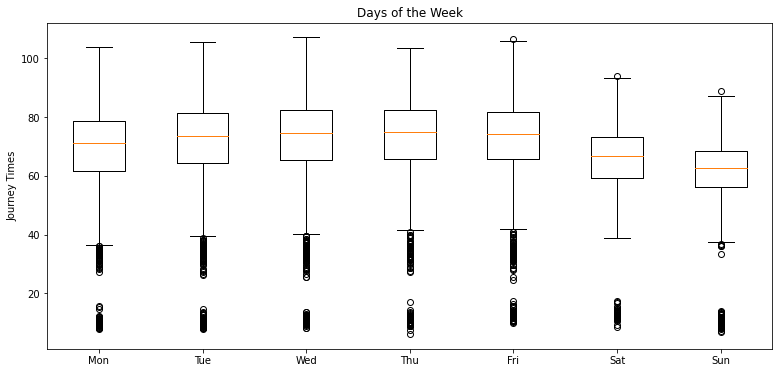

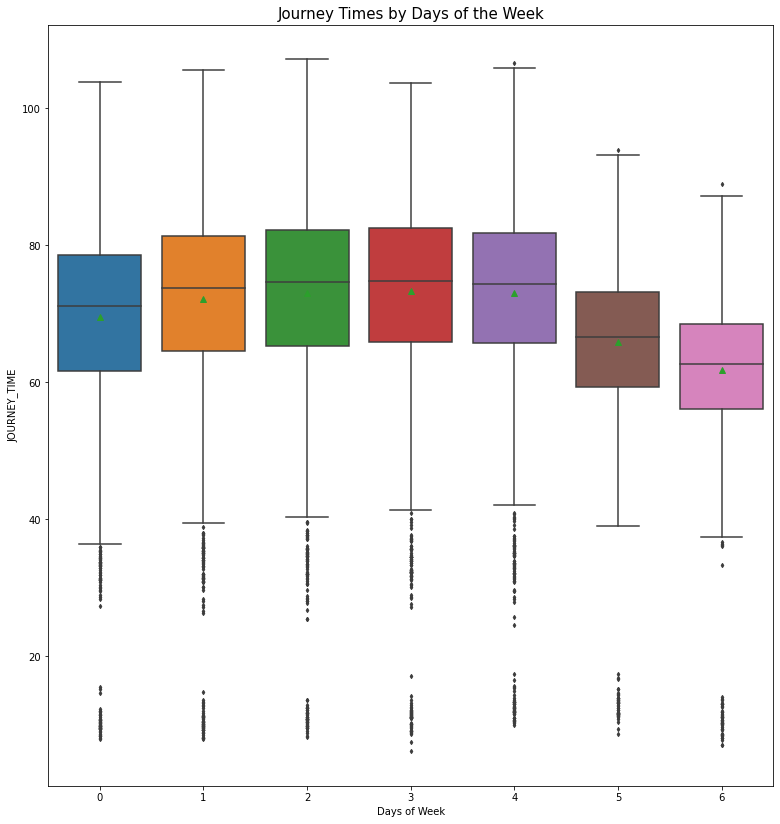

In [83]:
plt.figure(figsize=(13, 6))
Mon = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 0]["JOURNEY_TIME"]
Tue = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 1]["JOURNEY_TIME"]
Wed = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 2]["JOURNEY_TIME"]
Thu = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 3]["JOURNEY_TIME"]
Fri = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 4]["JOURNEY_TIME"]
Sat = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 5]["JOURNEY_TIME"]
Sun = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 6]["JOURNEY_TIME"]


labels =["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.boxplot([Mon, Tue, Wed, Thu, Fri, Sat, Sun], labels=labels)

plt.title("Days of the Week")
plt.ylabel("Journey Times")
plt.show()

fig, ax = plt.subplots(figsize=(13,14))
# means = train['Price(€)'].groupby(train["County"]).mean().sort_values().index
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.boxplot(x = fortySixA1['DAYOFWEEK'], y=fortySixA1['JOURNEY_TIME'], fliersize = 3, showmeans = True)
plt.xlabel('Days of Week')

plt.title('Journey Times by Days of the Week')
plt.show()

<AxesSubplot:xlabel='Days of the Week', ylabel='Journey Times Average'>

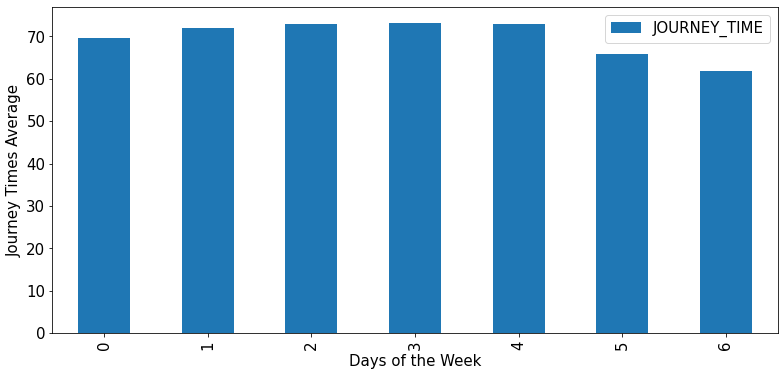

In [84]:
fortySixA1.groupby(by ="DAYOFWEEK").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(13, 6), ylabel="Journey Times Average", xlabel="Days of the Week")

 - There is noticeably more dispersion of journey times on days 1 to 5, with day 7 being the shortest and most consistent time for the bus route.
 - The fact thart there is a noticeable variation by day suggests that this feature will give some value in predicting the target feature.
##### removing outliers is based off of this information but must be done earlier, before the dataframe was divided by route and direction.

<AxesSubplot:xlabel='Time of the Day', ylabel='Journey Times Average'>

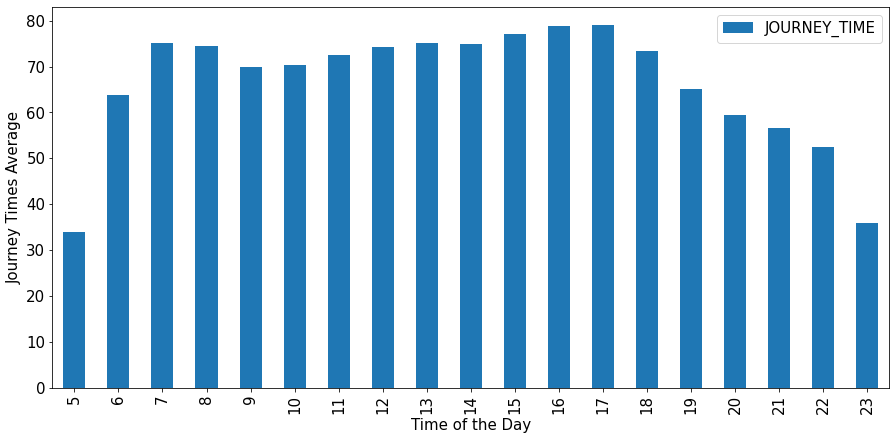

In [85]:
fortySixA1.groupby(by ="HOUR_DEPARTURE").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Time of the Day")


<AxesSubplot:xlabel='Time of the Day', ylabel='Journey Times Average'>

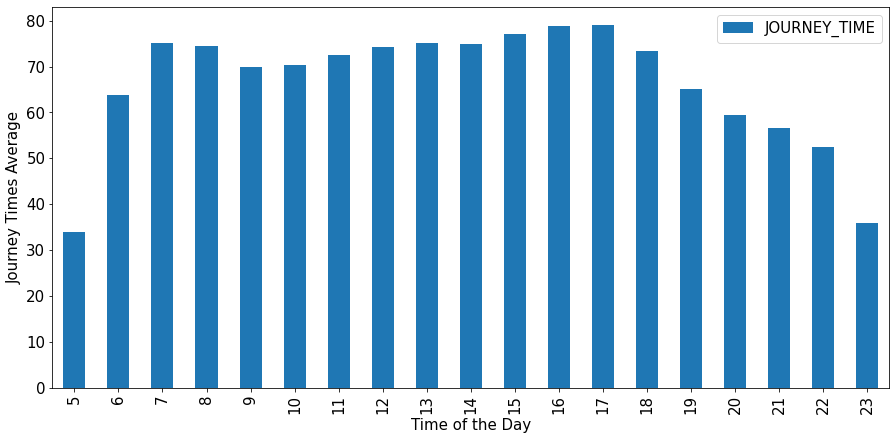

In [86]:
fortySixA1.groupby(by ="HOUR_DEPARTURE").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Time of the Day")


- The time of day feature shows a large variation in journey times, with an expectedly lower journey time in the early hours of the morning and longer journey times during traditional work start and finish times.
- This will likely be a highly leveraged feature in the ML model.
- Understandbly, the 46a and 16 routes have somewhat different looking variations between late night and mid day times. 

<AxesSubplot:xlabel='Day or Night', ylabel='Journey Times Average'>

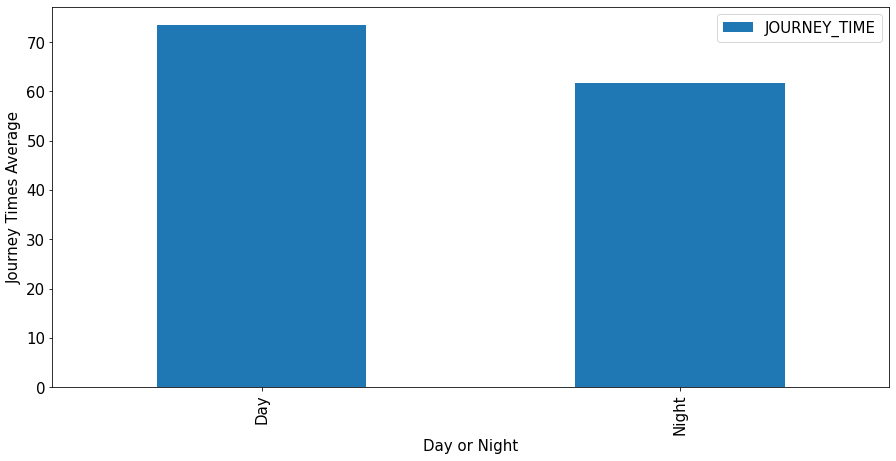

In [87]:
fortySixA1.groupby(by ="day/night").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Day or Night")

- Day or Night column reaffirms conclusions from the time of day column but could provide some extra value as it is a two category column so could be easier for a random forest or decision tree to utilise

<AxesSubplot:xlabel='Temperature Categories (cold to warm)', ylabel='Journey Times Average'>

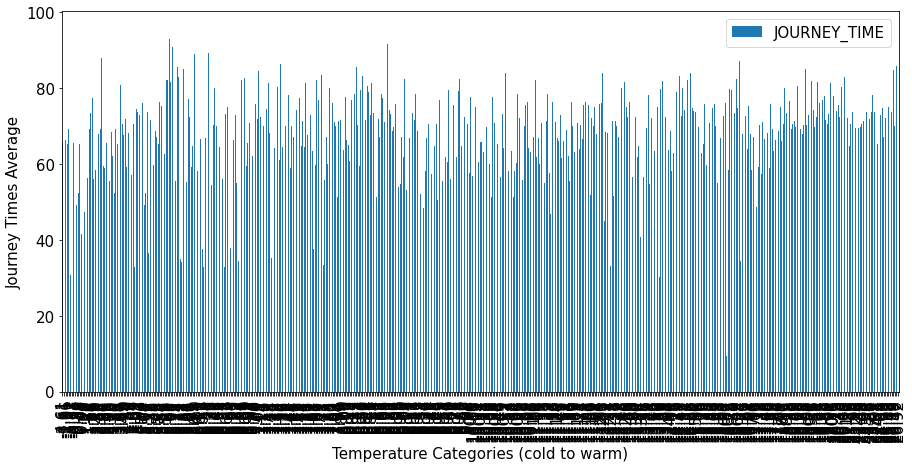

In [88]:

fortySixA1.groupby(by ="temp").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Temperature Categories (cold to warm)")

- The temperature feature show a very slight change in journey times, with a gradual increase when the weather is warmer as well as an increase when the weather drops below zero.


<AxesSubplot:xlabel='Weather Icon', ylabel='Journey Times Average'>

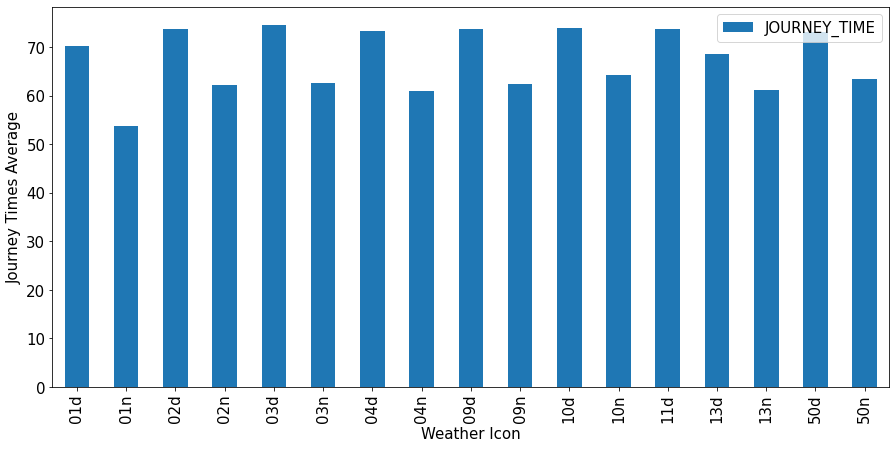

In [89]:
fortySixA1.groupby(by ="weather_icon").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Weather Icon")

- The original data for the weather was in the for 1n, 1d to denote differene for day and night as well as weather before being factorised. Hence whiy the chart goes up and down.
- The weather icon doesnt seem add much as the time of day will indicate whether it is day or night anyway and the weather description will indicate the weather.

<AxesSubplot:xlabel='Visibiliy Level', ylabel='Journey Times Average'>

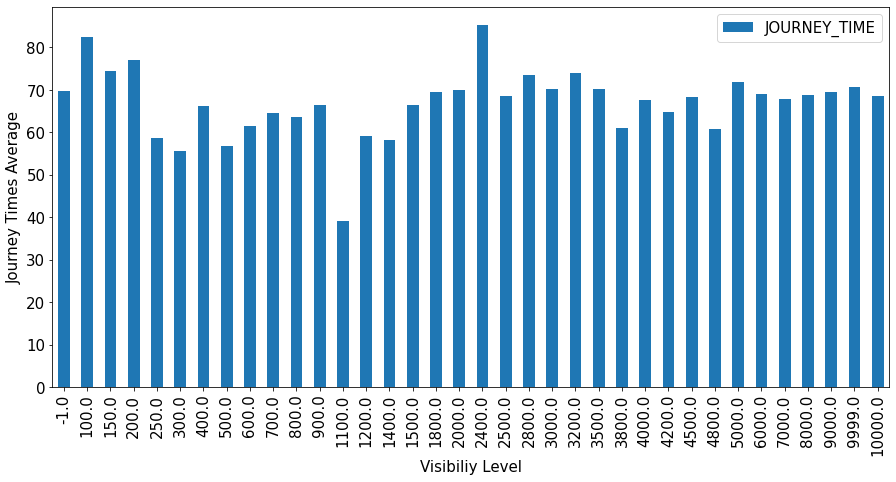

In [90]:
fortySixA1.groupby(by ="visibility").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Visibiliy Level")

- Visibility doesn't appear to have a clear influence on the target feature. The variance between each column is likely just a sample bias.
- It should be exceluded from the ML model.

<AxesSubplot:xlabel='Weather Description Category', ylabel='Journey Times Average'>

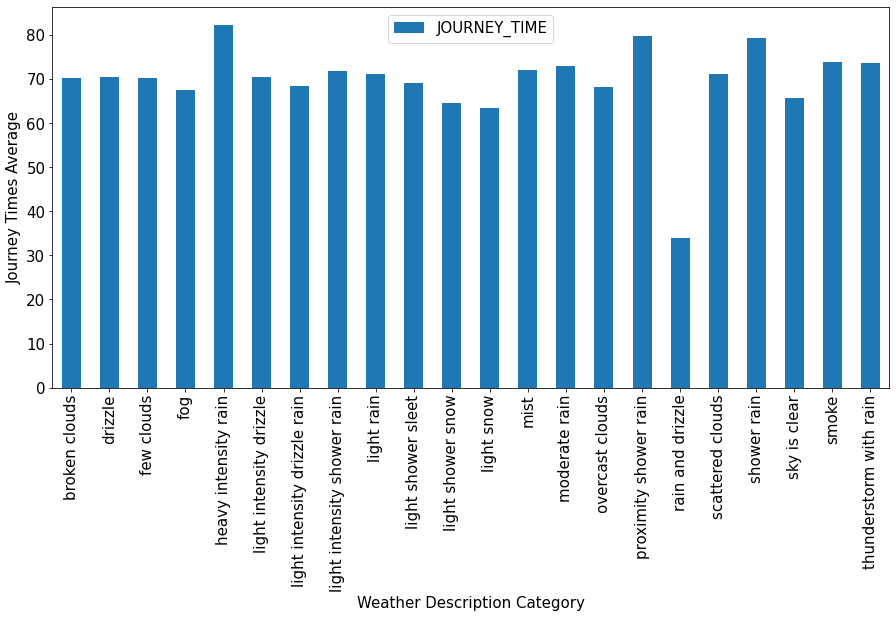

In [91]:
fortySixA1.groupby(by ="weather_description").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Weather Description Category")

- The order in which the weather description categories were factorised is not based on the severity so pay no attention to the order.
- There is some variance between different categories with one unusually short average journey time for category 18. I suspect this is on days of extreme weather when many routes may be closed.
- The feature appears to hold some value.

### Factorising

In [92]:
trips.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
DAYOFWEEK                        int64
HOUR_DEPARTURE                    int8
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                    object
weather_description             object
weather_icon                    object
LINE_DIRECTION                category
planned_journey_time           float64
error                          float64
leave_error                    float64
day/night                       object
dtype: object

In [93]:
trips['weather_main'] = pd.factorize(trips['weather_main'])[0]
trips['weather_description'] = pd.factorize(trips['weather_description'])[0]
trips['weather_icon'] = pd.factorize(trips['weather_icon'])[0]
trips['day/night'] = pd.factorize(trips['day/night'])[0]



/tmp/ipykernel_26195/2173255009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips['weather_main'] = pd.factorize(trips['weather_main'])[0]
/tmp/ipykernel_26195/2173255009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips['weather_description'] = pd.factorize(trips['weather_description'])[0]
/tmp/ipykernel_26195/2173255009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [94]:
trips

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error,leave_error,day/night
0,2018-02-07,6253783,87245,84600,87524,84600,2,23,48.733333,6.39,9999.0,7.2,0,0,0,68_1,44.083333,4.650000,0.000000,0
1,2018-02-07,6254942,35512,32100,36329,32082,2,8,70.783333,-1.61,9999.0,4.1,1,1,1,45A_2,56.866667,13.916667,-0.300000,1
2,2018-02-07,6259460,57261,54420,58463,54443,2,15,67.000000,4.39,9999.0,5.1,0,0,2,25A_1,47.350000,19.650000,0.383333,1
3,2018-02-07,6253175,85383,81600,84682,81608,2,22,51.233333,5.39,9999.0,8.8,1,2,3,14_1,63.050000,-11.816667,0.133333,0
4,2018-02-07,6248240,41648,37200,42019,37538,2,10,74.683333,0.39,9999.0,5.7,1,2,4,77A_2,74.133333,0.550000,5.633333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893305,2018-05-14,6765652,30626,29100,30482,29119,0,8,22.716667,12.39,9999.0,3.6,1,2,4,53_2,25.433333,-2.716667,0.316667,1
1893306,2018-05-14,6765662,65950,64800,66270,64815,0,18,24.250000,16.46,9999.0,0.5,1,2,4,53_2,19.166667,5.083333,0.250000,1
1893307,2018-05-14,6765828,28647,25800,28688,25858,0,7,47.166667,11.39,9999.0,2.6,1,2,4,45A_1,47.450000,-0.283333,0.966667,1
1893308,2018-05-14,6765849,61560,57840,61365,57859,0,16,58.433333,15.46,9999.0,2.6,1,2,4,123_2,62.000000,-3.566667,0.316667,1


In [95]:
fortySixA1 = trips.loc[trips['LINE_DIRECTION']=="46A_1"]
onefourfive = trips.loc[trips['LINE_DIRECTION']=="145_1"]
sixteen = trips.loc[trips['LINE_DIRECTION']=="16_1"]

In [112]:
fortySixA1.nunique()

DAYOFSERVICE              360
TRIPID                  11093
PLANNEDTIME_ARR          6564
PLANNEDTIME_DEP           260
ACTUALTIME_ARR          25814
ACTUALTIME_DEP          21075
DAYOFWEEK                   7
HOUR_DEPARTURE             19
JOURNEY_TIME             3966
temp                      533
visibility                 36
wind_speed                 83
weather_main                9
weather_description        22
weather_icon               17
LINE_DIRECTION              1
planned_journey_time      858
error                    5952
leave_error              1186
day/night                   2
dtype: int64

In [96]:
# setting random state to 0 as does not matter that order is the same each time once its shuffled
# setting test_size to 30%
# using sklearns train_test_split method
train_46, test_46 = train_test_split(fortySixA1, test_size=0.3, random_state=0)
train_145, test_145 = train_test_split(onefourfive, test_size=0.3, random_state=0)
train_16, test_16 = train_test_split(sixteen, test_size=0.3, random_state=0)

In [97]:
# resetting the indexes of both to start at 0 (preserves order generated above)
train_46 = train_46.reset_index(drop=True)
test_46 = test_46.reset_index(drop=True)

train_145 = train_145.reset_index(drop=True)
test_145 = test_145.reset_index(drop=True)

train_16 = train_16.reset_index(drop=True)
test_16 = test_16.reset_index(drop=True)

In [98]:
print("Training dataset for 46A has", train_46.shape[0], "rows and test dataset has", test_46.shape[0], "rows.")

print("Training dataset for 145 has", train_145.shape[0], "rows and test dataset has", test_145.shape[0], "rows.")

print("Training dataset for 16 has", train_16.shape[0], "rows and test dataset has", test_16.shape[0], "rows.")


Training dataset for 46A has 23586 rows and test dataset has 10109 rows.
Training dataset for 145 has 18123 rows and test dataset has 7768 rows.
Training dataset for 16 has 13688 rows and test dataset has 5867 rows.


In [99]:
# verify datatypes have remained intact
train_46.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
DAYOFWEEK                        int64
HOUR_DEPARTURE                    int8
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                     int64
weather_description              int64
weather_icon                     int64
LINE_DIRECTION                category
planned_journey_time           float64
error                          float64
leave_error                    float64
day/night                        int64
dtype: object

In [100]:
predict_columns = ['HOUR_DEPARTURE', 'DAYOFWEEK', "temp", "weather_icon", "wind_speed", "weather_description", "weather_main", "day/night", "leave_error", "visibility"]
predictions = [feature for feature in predict_columns]
target = 'JOURNEY_TIME'

In [101]:
# initialise the RandomForestClassifier
# set random state value so that results can be replicated
forestReg_46 = RandomForestRegressor(n_estimators=100, max_depth=100,oob_score=True, random_state=1)

forestReg_145 = RandomForestRegressor(n_estimators=100, max_depth=100,oob_score=True, random_state=1)

forestReg_16 = RandomForestRegressor(n_estimators=100, max_depth=100,oob_score=True, random_state=1)


# fit the model on the training set using the predictions features
# y value is now the quantiles
forestReg_46.fit(train_46[predictions], train_46[target])

forestReg_145.fit(train_145[predictions], train_145[target])

forestReg_16.fit(train_16[predictions], train_16[target])

RandomForestRegressor(max_depth=100, oob_score=True, random_state=1)

In [102]:
feature_importance_46 = pd.DataFrame({'feature': train_46[predictions].columns, 'importance':forestReg_46.feature_importances_})
print("Feature Importance Random Forest Regressor for 46A: ")
feature_importance_46.sort_values('importance', ascending=False)

Feature Importance Random Forest Regressor for 46A: 


,feature,importance
0,HOUR_DEPARTURE,0.487243
8,leave_error,0.185192
1,DAYOFWEEK,0.102843
2,temp,0.080798
4,wind_speed,0.068966
3,weather_icon,0.024137
5,weather_description,0.023522
9,visibility,0.012727
6,weather_main,0.010723
7,day/night,0.003849


In [103]:
feature_importance_145 = pd.DataFrame({'feature': train_145[predictions].columns, 'importance':forestReg_145.feature_importances_})
print("Feature Importance Random Forest Regressor for 145:")
feature_importance_145.sort_values('importance', ascending=False)

Feature Importance Random Forest Regressor for 145:


,feature,importance
0,HOUR_DEPARTURE,0.403145
8,leave_error,0.237000
1,DAYOFWEEK,0.099756
2,temp,0.093869
4,wind_speed,0.080578
3,weather_icon,0.027615
5,weather_description,0.025933
9,visibility,0.015489
6,weather_main,0.012519
7,day/night,0.004095


In [104]:
feature_importance_16 = pd.DataFrame({'feature': train_46[predictions].columns, 'importance':forestReg_16.feature_importances_})
print("Feature Importance Random Forest Regressor for 16:")
feature_importance_16.sort_values('importance', ascending=False)

Feature Importance Random Forest Regressor for 16:


,feature,importance
0,HOUR_DEPARTURE,0.536833
8,leave_error,0.140367
1,DAYOFWEEK,0.113626
2,temp,0.074565
4,wind_speed,0.065209
5,weather_description,0.022357
3,weather_icon,0.020621
9,visibility,0.010777
6,weather_main,0.008913
7,day/night,0.006732


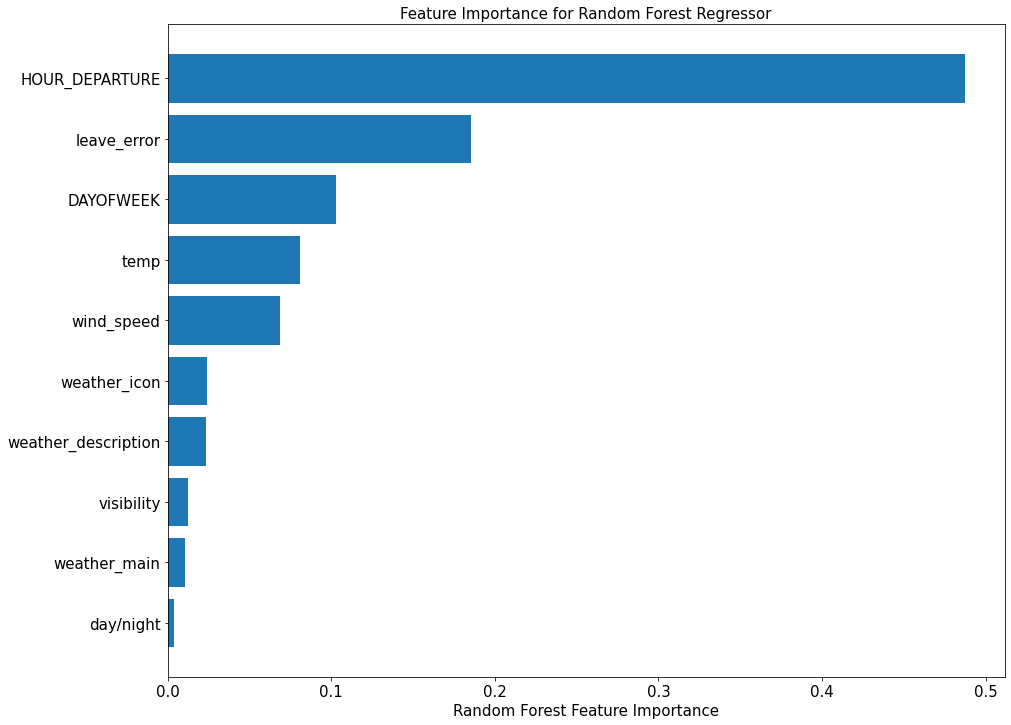

In [105]:
sorted_idx = forestReg_46.feature_importances_.argsort()
plt.figure(figsize=(15,12))
plt.barh(train_46[predictions].columns[sorted_idx], forestReg_46.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

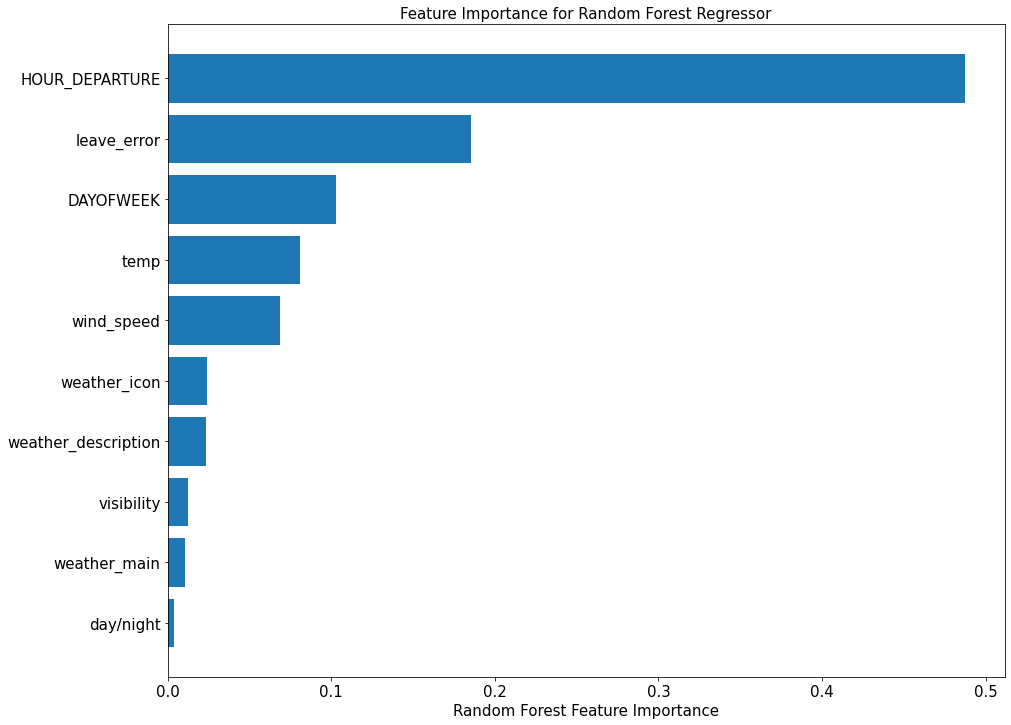

In [106]:
sorted_idx = forestReg_145.feature_importances_.argsort()
plt.figure(figsize=(15,12))
plt.barh(train_46[predictions].columns[sorted_idx], forestReg_46.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

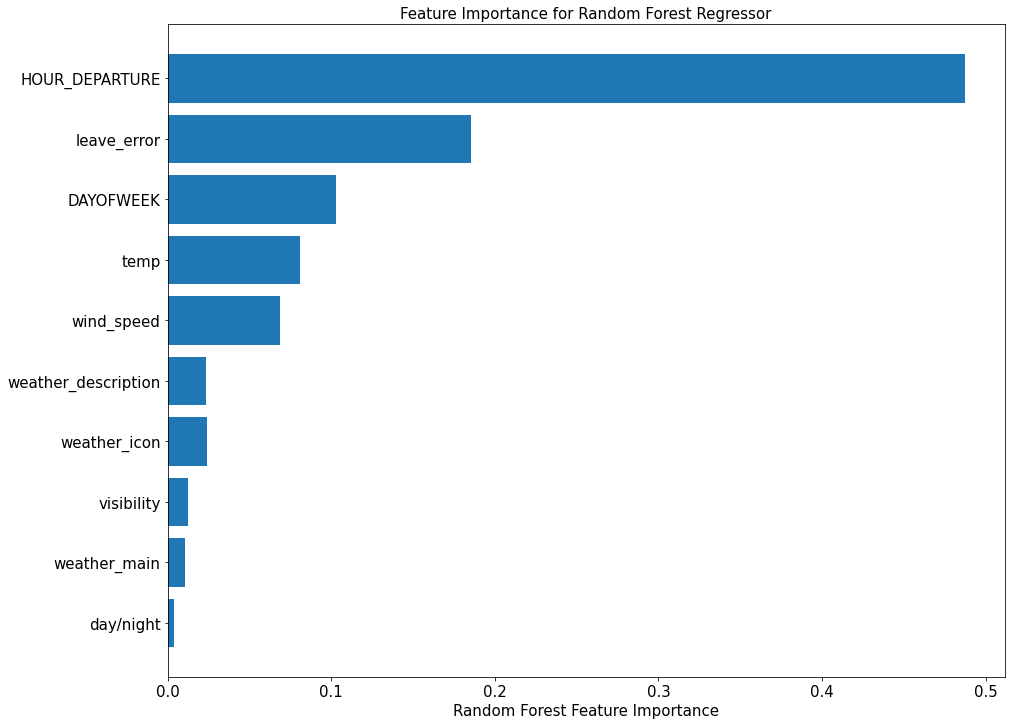

In [107]:
sorted_idx = forestReg_16.feature_importances_.argsort()
plt.figure(figsize=(15,12))
plt.barh(train_46[predictions].columns[sorted_idx], forestReg_46.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

In [108]:
forestRegPredictedTrain46_10 = forestReg_46.predict(test_46[predictions].head(10))
print("First 10 predictions with Random Forest Regression for Route 46a:")
predicted_df_train_reg_46 = pd.concat([test_46[target].head(10), pd.DataFrame(forestRegPredictedTrain46_10, columns=['Predicted Time'])], axis=1)
predicted_df_train_reg_46

First 10 predictions with Random Forest Regression for Route 46a:


,JOURNEY_TIME,Predicted Time
0,73.983333,82.761500
1,60.583333,69.137667
2,68.266667,62.428000
3,72.566667,79.824667
4,80.150000,72.274000
5,85.883333,76.777833
6,82.566667,74.964500
7,77.416667,71.159847
8,64.900000,62.204333
9,76.616667,76.972667


In [109]:
forestRegPredictedTrain145_10 = forestReg_145.predict(test_145[predictions].head(10))
print("First 10 predictions with Random Forest Regression for Route 145a:")
predicted_df_train_reg_145 = pd.concat([test_145[target].head(10), pd.DataFrame(forestRegPredictedTrain145_10, columns=['Predicted Time'])], axis=1)
predicted_df_train_reg_145

First 10 predictions with Random Forest Regression for Route 145a:


,JOURNEY_TIME,Predicted Time
0,84.600000,77.742167
1,79.366667,86.275667
2,65.283333,73.200056
3,80.750000,61.312500
4,99.700000,92.475903
5,101.033333,96.737750
6,104.416667,91.756000
7,82.250000,74.170500
8,89.766667,96.317167
9,63.516667,74.042000


In [110]:
forestRegPredictedTrain16_10 = forestReg_16.predict(test_16[predictions].head(10))
print("First 10 predictions with Random Forest Regression for Route 16:")
predicted_df_train_reg_16 = pd.concat([test_16[target].head(10), pd.DataFrame(forestRegPredictedTrain16_10, columns=['Predicted Time'])], axis=1)
predicted_df_train_reg_16

First 10 predictions with Random Forest Regression for Route 16:


,JOURNEY_TIME,Predicted Time
0,99.933333,94.080500
1,89.316667,91.962833
2,74.500000,73.176167
3,98.916667,97.529500
4,115.500000,108.849333
5,104.683333,102.693500
6,90.300000,77.615500
7,107.333333,106.257333
8,81.400000,90.166000
9,110.266667,115.137333


In [111]:
# predict entire training dataset using random forest regressor model
forestRegPredictedTrain = forestReg.predict(train[predictions])

NameError: name 'forestReg' is not defined

In [ ]:
# used to compute all metrics
def RegressionMetrics(actualVal, predictions, num_pred, num_samples):
    # classification evaluation measures
    print("MAE:", metrics.mean_absolute_error(actualVal, predictions))
    print("MAPE:", metrics.mean_absolute_percentage_error(actualVal, predictions))
    
    print("RMSE:", metrics.mean_squared_error(actualVal, predictions)**0.5)
    r2 = metrics.r2_score(actualVal, predictions)
    print("R2:", r2)
    print("Adjusted R2:", 1 - ((1-r2) * ((num_samples-1)/(num_samples-num_pred-1))))

In [ ]:
predictors = train[predictions].shape[1]
print("\u0332".join("Regression Evaluation Measures for Training Set"))
RegressionMetrics(train[target], forestRegPredictedTrain, predictors, train.shape[0])

In [ ]:
#[estimator.get_depth() for estimator in forestReg.estimators_]

In [ ]:
#leavetimes = pd.read_csv('rt_leavetimes_DB_2018.txt', sep=";", nrows=10000)

In [ ]:
#leavetimes

# LEAVE TIMES TESTER

In [6]:
LT_46A_68_1 = pd.read_csv('test_46a_dask.csv')

In [7]:
LT_46A_68_1

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,LINEID,...,HOUR_DEPARTURE,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,date,ROUTE_DIRECTION
0,2018-01-02,5968538,32,2017,28616,28616,27885.0,27896.0,1930279,46A,...,7.0,1.514876e+09,2.0,10.0,3.0,6.0,9.0,11.0,2018-01-02 07:00:00,46A_68_1
1,2018-01-02,5968538,45,2035,29338,29338,28416.0,28416.0,1930279,46A,...,7.0,1.514876e+09,2.0,10.0,3.0,6.0,9.0,11.0,2018-01-02 07:00:00,46A_68_1
2,2018-01-02,5968538,40,4567,29069,29069,28216.0,28240.0,1930279,46A,...,7.0,1.514876e+09,2.0,10.0,3.0,6.0,9.0,11.0,2018-01-02 07:00:00,46A_68_1
3,2018-01-02,5968538,14,758,27483,27483,27219.0,27219.0,1930279,46A,...,7.0,1.514876e+09,2.0,10.0,3.0,6.0,9.0,11.0,2018-01-02 07:00:00,46A_68_1
4,2018-01-02,5968538,47,2039,29419,29419,28506.0,28506.0,1930279,46A,...,7.0,1.514876e+09,2.0,10.0,3.0,6.0,9.0,11.0,2018-01-02 07:00:00,46A_68_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,2018-12-18,8453335,41,2031,29509,29509,29574.0,29574.0,1932339,46A,...,8.0,1.545120e+09,3.0,10.0,2.0,6.0,9.0,11.0,2018-12-18 08:00:00,46A_68_1
14470,2018-12-17,8453335,11,2795,27395,27395,27726.0,27744.0,1930279,46A,...,7.0,1.545030e+09,2.0,10.0,1.0,1.0,0.0,7.0,2018-12-17 07:00:00,46A_68_1
14471,2018-12-17,8453335,22,2009,28147,28147,28478.0,28492.0,1930279,46A,...,7.0,1.545030e+09,2.0,10.0,1.0,1.0,0.0,7.0,2018-12-17 07:00:00,46A_68_1
14472,2018-12-17,8453335,32,2017,28865,28865,29162.0,29174.0,1930279,46A,...,8.0,1.545034e+09,2.0,10.0,2.0,1.0,0.0,7.0,2018-12-17 08:00:00,46A_68_1


In [8]:
LT_46A_68_1.shape

(14474, 24)

In [9]:
LT_46A_68_1.nunique()

DAYOFSERVICE            196
TRIPID                   60
PROGRNUMBER              47
STOPPOINTID              47
PLANNEDTIME_ARR        1343
PLANNEDTIME_DEP        1343
ACTUALTIME_ARR         4602
ACTUALTIME_DEP         4595
VEHICLEID                89
LINEID                    1
ROUTEID                   1
DIRECTION                 1
PLANNEDTIME_DEP_T         2
ACTUALTIME_DEP_T        191
HOUR_DEPARTURE            3
dt                      393
temp                      5
visibility               11
wind_speed                9
weather_main              7
weather_description      14
weather_icon             16
date                    393
ROUTE_DIRECTION           1
dtype: int64

In [10]:
LT_46A_68_1.dtypes

DAYOFSERVICE            object
TRIPID                   int64
PROGRNUMBER              int64
STOPPOINTID              int64
PLANNEDTIME_ARR          int64
PLANNEDTIME_DEP          int64
ACTUALTIME_ARR         float64
ACTUALTIME_DEP         float64
VEHICLEID                int64
LINEID                  object
ROUTEID                 object
DIRECTION                int64
PLANNEDTIME_DEP_T        int64
ACTUALTIME_DEP_T       float64
HOUR_DEPARTURE         float64
dt                     float64
temp                   float64
visibility             float64
wind_speed             float64
weather_main           float64
weather_description    float64
weather_icon           float64
date                    object
ROUTE_DIRECTION         object
dtype: object

In [11]:
LT_46A_68_1.isnull().sum()

DAYOFSERVICE              0
TRIPID                    0
PROGRNUMBER               0
STOPPOINTID               0
PLANNEDTIME_ARR           0
PLANNEDTIME_DEP           0
ACTUALTIME_ARR            0
ACTUALTIME_DEP            0
VEHICLEID                 0
LINEID                    0
ROUTEID                   0
DIRECTION                 0
PLANNEDTIME_DEP_T         0
ACTUALTIME_DEP_T       2487
HOUR_DEPARTURE            0
dt                        0
temp                      0
visibility                0
wind_speed                0
weather_main              0
weather_description       0
weather_icon              0
date                      0
ROUTE_DIRECTION           0
dtype: int64

- will probably be dropped.
- those are stats from the trips file.

In [7]:
nulls_lt = LT_46A_68_1[LT_46A_68_1["ACTUALTIME_DEP_T"].isnull() == True]

In [8]:
nulls_lt.shape

(2487, 24)

In [9]:
nulls_lt = nulls_lt[["ACTUALTIME_DEP_T", "PLANNEDTIME_DEP_T", "PROGRNUMBER", "DAYOFSERVICE"]]

In [10]:
nulls_lt

,ACTUALTIME_DEP_T,PLANNEDTIME_DEP_T,PROGRNUMBER,DAYOFSERVICE
0,NaN,26400,32,2018-01-02
1,NaN,26400,45,2018-01-02
2,NaN,26400,40,2018-01-02
3,NaN,26400,14,2018-01-02
4,NaN,26400,47,2018-01-02
...,...,...,...,...
14465,NaN,26400,43,2018-12-19
14470,NaN,26400,11,2018-12-17
14471,NaN,26400,22,2018-12-17
14472,NaN,26400,32,2018-12-17


In [11]:
nulls_lt.nunique()

ACTUALTIME_DEP_T      0
PLANNEDTIME_DEP_T     2
PROGRNUMBER          46
DAYOFSERVICE         53
dtype: int64

In [12]:
nulls2time = nulls_lt.loc[nulls_lt["PLANNEDTIME_DEP_T"] != 26400]

In [13]:
nulls2time

,ACTUALTIME_DEP_T,PLANNEDTIME_DEP_T,PROGRNUMBER,DAYOFSERVICE
80,NaN,27600,36,2018-01-03
81,NaN,27600,38,2018-01-03
82,NaN,27600,39,2018-01-03
83,NaN,27600,40,2018-01-03
84,NaN,27600,41,2018-01-03
...,...,...,...,...
11749,NaN,27600,10,2018-09-07
11750,NaN,27600,44,2018-09-07
11770,NaN,27600,29,2018-09-06
11773,NaN,27600,22,2018-09-06


- only 2 times have the null values but it on multiple different dates
- 7.20am and 7.40am

In [14]:
LT_46A_68_1 = LT_46A_68_1.dropna()

In [15]:
LT_46A_68_1.isnull().sum()

DAYOFSERVICE           0
TRIPID                 0
PROGRNUMBER            0
STOPPOINTID            0
PLANNEDTIME_ARR        0
PLANNEDTIME_DEP        0
ACTUALTIME_ARR         0
ACTUALTIME_DEP         0
VEHICLEID              0
LINEID                 0
ROUTEID                0
DIRECTION              0
PLANNEDTIME_DEP_T      0
ACTUALTIME_DEP_T       0
HOUR_DEPARTURE         0
dt                     0
temp                   0
visibility             0
wind_speed             0
weather_main           0
weather_description    0
weather_icon           0
date                   0
ROUTE_DIRECTION        0
dtype: int64

In [16]:
check_1pn = LT_46A_68_1.loc[LT_46A_68_1["PROGRNUMBER"] == 1]

In [17]:
check_1pn = check_1pn[["ACTUALTIME_DEP_T", "PLANNEDTIME_DEP_T", "PROGRNUMBER", "DAYOFSERVICE", "ACTUALTIME_DEP", "PLANNEDTIME_DEP"]]

In [18]:
check_1pn

,ACTUALTIME_DEP_T,PLANNEDTIME_DEP_T,PROGRNUMBER,DAYOFSERVICE,ACTUALTIME_DEP,PLANNEDTIME_DEP
74,27913.0,27600,1,2018-01-02,27913.0,27600
123,26075.0,26400,1,2018-01-03,26075.0,26400
205,27553.0,27600,1,2018-01-04,27553.0,27600
207,26513.0,26400,1,2018-01-04,26513.0,26400
232,27455.0,27600,1,2018-01-05,27455.0,27600
...,...,...,...,...,...,...
14070,26439.0,26400,1,2018-12-11,26439.0,26400
14078,26438.0,26400,1,2018-12-12,26438.0,26400
14247,26424.0,26400,1,2018-12-18,26424.0,26400
14333,26410.0,26400,1,2018-12-20,26410.0,26400


- trips data is not necessary because its included in leavetimes

In [19]:
LT_46A_68_1 = LT_46A_68_1.drop(["PLANNEDTIME_DEP_T", "ACTUALTIME_DEP_T", "date", "dt"], axis=1)

In [20]:
LT_46A_68_1

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,LINEID,ROUTEID,DIRECTION,HOUR_DEPARTURE,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,ROUTE_DIRECTION
37,2018-01-02,5958760,47,2039,30874,30874,30882.0,30882.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1
38,2018-01-02,5958760,45,2035,30784,30784,30787.0,30821.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1
39,2018-01-02,5958760,44,2034,30728,30728,30729.0,30740.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1
40,2018-01-02,5958760,43,2033,30704,30704,30696.0,30707.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1
41,2018-01-02,5958760,41,2031,30546,30546,30595.0,30621.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14461,2018-12-20,8453335,39,4566,29338,29338,29264.0,29264.0,1000299,46A,46A_68,1,8.0,2.0,10.0,1.0,1.0,19.0,5.0,46A_68_1
14466,2018-12-18,8453335,12,756,27482,27482,27674.0,27682.0,1932339,46A,46A_68,1,7.0,3.0,10.0,2.0,6.0,5.0,11.0,46A_68_1
14467,2018-12-18,8453335,21,2008,28084,28084,28198.0,28198.0,1932339,46A,46A_68,1,7.0,3.0,10.0,2.0,6.0,5.0,11.0,46A_68_1
14468,2018-12-18,8453335,31,2015,28833,28833,28911.0,28919.0,1932339,46A,46A_68,1,8.0,3.0,10.0,2.0,6.0,9.0,11.0,46A_68_1


In [21]:
LT_46A_68_1.nunique()

DAYOFSERVICE            179
TRIPID                   58
PROGRNUMBER              47
STOPPOINTID              47
PLANNEDTIME_ARR        1343
PLANNEDTIME_DEP        1343
ACTUALTIME_ARR         4342
ACTUALTIME_DEP         4324
VEHICLEID                87
LINEID                    1
ROUTEID                   1
DIRECTION                 1
HOUR_DEPARTURE            3
temp                      5
visibility               11
wind_speed                9
weather_main              7
weather_description      14
weather_icon             16
ROUTE_DIRECTION           1
dtype: int64

In [22]:
CHECK = LT_46A_68_1[["TRIPID", "PROGRNUMBER", "DAYOFSERVICE"]]

In [23]:
CHECK.nunique()

TRIPID           58
PROGRNUMBER      47
DAYOFSERVICE    179
dtype: int64

In [24]:
CHECK.duplicated(keep=False).sum()

0

-  No duplicates of PROGRNUMBER for any trips

In [25]:
CHECK["PROGRNUMBER"].value_counts()

1     260
5     259
2     259
3     259
4     259
6     259
13    258
12    258
8     258
7     258
9     258
10    258
11    258
14    257
15    256
18    256
17    256
16    256
47    255
28    254
29    254
20    254
32    254
31    254
30    254
42    253
41    253
23    253
22    253
39    253
36    253
43    253
46    253
44    253
24    253
40    253
35    253
38    253
37    253
21    253
33    253
27    253
26    253
25    253
45    253
19    253
34    253
Name: PROGRNUMBER, dtype: int64

- stops are missing for a small number of trips.
- most of the numbers with less counts are larger numbers so it is liekly because the bus trip was incomplete.

In [26]:
CHECK["PROGRNUMBER"].max()

47

In [27]:
CHECK["PROGRNUMBER"].min()

1

In [1]:
tripsids = CHECK.TRIPID.unique()
print(tripsids)

NameError: name 'CHECK' is not defined

In [29]:
dates = CHECK.DAYOFSERVICE.unique()
print(dates)

['2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-08'
 '2018-01-09' '2018-01-10' '2018-01-11' '2018-01-12' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-22'
 '2018-01-23' '2018-01-24' '2018-01-25' '2018-01-26' '2018-01-30'
 '2018-01-29' '2018-02-01' '2018-02-16' '2018-02-02' '2018-02-05'
 '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-12'
 '2018-02-13' '2018-02-15' '2018-02-19' '2018-02-20' '2018-02-21'
 '2018-02-22' '2018-02-23' '2018-02-27' '2018-02-28' '2018-02-14'
 '2018-02-26' '2018-03-07' '2018-03-05' '2018-03-06' '2018-03-08'
 '2018-03-09' '2018-03-12' '2018-03-13' '2018-03-14' '2018-03-15'
 '2018-03-16' '2018-03-19' '2018-03-20' '2018-03-21' '2018-03-22'
 '2018-03-23' '2018-03-26' '2018-03-27' '2018-03-28' '2018-03-29'
 '2018-03-30' '2018-04-03' '2018-04-04' '2018-04-05' '2018-04-06'
 '2018-04-09' '2018-04-10' '2018-04-11' '2018-04-12' '2018-04-13'
 '2018-04-16' '2018-04-23' '2018-04-17' '2018-04-18' '2018-04-19'
 '2018-04-

In [30]:
%%time
bad_trips = []
for j in dates:
    for i in tripsids:
        curr = LT_46A_68_1.loc[(LT_46A_68_1["TRIPID"] == i) & (LT_46A_68_1["DAYOFSERVICE"] == j)]
        if len(curr) == 0:
            pass
        else:
            n_stops = curr["PROGRNUMBER"].count()
            if n_stops != 47:
                bad_trips.append([i, j])
    

print(bad_trips)      

[[5968538, '2018-01-03'], [6105593, '2018-01-10'], [6397901, '2018-03-19'], [6583906, '2018-03-27'], [6638206, '2018-04-17'], [6643302, '2018-04-20'], [6770480, '2018-05-21'], [7498790, '2018-08-27'], [8096715, '2018-09-21'], [7783978, '2018-10-05']]
CPU times: user 15.5 s, sys: 0 ns, total: 15.5 s
Wall time: 15.5 s


In [31]:
%%time
for i in bad_trips:
    LT_46A_68_1 = LT_46A_68_1.drop(LT_46A_68_1[(LT_46A_68_1.TRIPID == i[0]) & (LT_46A_68_1.DAYOFSERVICE == i[1])].index)
    
    

#### ALL WORKS BUT MUST BE EDITED TO FIT THE ACTUAL DF

CPU times: user 32.6 ms, sys: 2.33 ms, total: 35 ms
Wall time: 33 ms


In [32]:
print(len(dates))

179


In [33]:
print(len(bad_trips))

10


In [34]:
new_dates = LT_46A_68_1.DAYOFSERVICE.unique()
print(len(new_dates))

173


In [ ]:
bad_trips = []
for j in dates:
    for i in tripsids:
        curr = CHECK.loc[(CHECK["TRIPID"] == i) & (CHECK["DAYOFSERVICE"] == j)]
        if len(curr) == 0:
            pass
        else:
            n_stops = curr["PROGRNUMBER"].count()
            if n_stops != 47: #max value of the progrnumber
                bad_trips.append([i, j])

for i in bad_trips:
    CHECK = CHECK.drop(CHECK[(CHECK.TRIPID == i[0]) & (CHECK.DAYOFSERVICE == i[1])].index)
     

In [35]:
CHECK.loc[(CHECK["TRIPID"] == 7498790)]

,TRIPID,PROGRNUMBER,DAYOFSERVICE
10227,7498790,46,2018-08-28
10229,7498790,29,2018-08-28
10231,7498790,34,2018-08-28
10233,7498790,39,2018-08-28
10235,7498790,42,2018-08-28
...,...,...,...
10642,7498790,35,2018-08-28
10646,7498790,3,2018-08-28
10652,7498790,15,2018-08-29
10655,7498790,19,2018-08-29


In [36]:
LT_46A_68_1.dtypes

DAYOFSERVICE            object
TRIPID                   int64
PROGRNUMBER              int64
STOPPOINTID              int64
PLANNEDTIME_ARR          int64
PLANNEDTIME_DEP          int64
ACTUALTIME_ARR         float64
ACTUALTIME_DEP         float64
VEHICLEID                int64
LINEID                  object
ROUTEID                 object
DIRECTION                int64
HOUR_DEPARTURE         float64
temp                   float64
visibility             float64
wind_speed             float64
weather_main           float64
weather_description    float64
weather_icon           float64
ROUTE_DIRECTION         object
dtype: object

## make code for checking if a later stop has an earlier time

In [37]:
# needed to make new list of dates and trip IDs
dates = LT_46A_68_1.DAYOFSERVICE.unique()
print(len(dates))

tripsids = LT_46A_68_1.TRIPID.unique()
print(len(tripsids))

173
58


In [38]:
%%time
bad_stops = []
valid_combs = []
for d in dates:
    comb_df = LT_46A_68_1.loc[(LT_46A_68_1["DAYOFSERVICE"] == d)]
    comb_trips = comb_df.TRIPID.unique()
    for t in comb_trips:
        valid_combs.append([t, d])




for i in valid_combs:

    trip_temp = LT_46A_68_1.loc[(LT_46A_68_1["TRIPID"] == i[0]) & (LT_46A_68_1["DAYOFSERVICE"] == i[1])]
          
    num_stops = trip_temp["PROGRNUMBER"].max()
    


    for n in range(1, num_stops-1):

        curr_stop = LT_46A_68_1.loc[(LT_46A_68_1["TRIPID"] == i[0]) & (LT_46A_68_1["DAYOFSERVICE"] == i[1]) & (LT_46A_68_1["PROGRNUMBER"] == n)]
        next_stop = LT_46A_68_1.loc[(LT_46A_68_1["TRIPID"] == i[0]) & (LT_46A_68_1["DAYOFSERVICE"] == i[1]) & (LT_46A_68_1["PROGRNUMBER"] == (n +1))]

        next_val = next_stop.iloc[0]["ACTUALTIME_ARR"]
        curr_val = curr_stop.iloc[0]["ACTUALTIME_ARR"]

        if next_val < curr_val :
            bad_stops.append([i, j]) #entire route will be corrupted
            break


print(bad_stops) 

# make code to remove the trips with bad data

[]
CPU times: user 43 s, sys: 0 ns, total: 43 s
Wall time: 43 s


- No values in the array so no bad data here
- Will still need to edit it to remove them for processing the entire data set
- the 43 seconds it took looks slow but originally it was 1 minute and 10 seconds so I'm happy with it

#### creating columns to find outliers

In [39]:
LT_46A_68_1.head(1)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,LINEID,ROUTEID,DIRECTION,HOUR_DEPARTURE,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,ROUTE_DIRECTION
37,2018-01-02,5958760,47,2039,30874,30874,30882.0,30882.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1


In [40]:
LT_46A_68_1["A_error"] = (LT_46A_68_1["ACTUALTIME_ARR"] - LT_46A_68_1['PLANNEDTIME_ARR'])
LT_46A_68_1["D_error"] = (LT_46A_68_1["ACTUALTIME_DEP"] - LT_46A_68_1['PLANNEDTIME_DEP'])

In [41]:
LT_46A_68_1.head(1)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,LINEID,...,HOUR_DEPARTURE,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,ROUTE_DIRECTION,A_error,D_error
37,2018-01-02,5958760,47,2039,30874,30874,30882.0,30882.0,1932297,46A,...,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1,8.0,8.0


- just a check to see if arrival and departure were actually different because they're identical in the first line

In [43]:
LT_46A_68_1.loc[(LT_46A_68_1["A_error"] != LT_46A_68_1["D_error"])]

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,LINEID,...,HOUR_DEPARTURE,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,ROUTE_DIRECTION,A_error,D_error
38,2018-01-02,5958760,45,2035,30784,30784,30787.0,30821.0,1932297,46A,...,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1,3.0,37.0
39,2018-01-02,5958760,44,2034,30728,30728,30729.0,30740.0,1932297,46A,...,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1,1.0,12.0
40,2018-01-02,5958760,43,2033,30704,30704,30696.0,30707.0,1932297,46A,...,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1,-8.0,3.0
41,2018-01-02,5958760,41,2031,30546,30546,30595.0,30621.0,1932297,46A,...,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1,49.0,75.0
42,2018-01-02,5958760,40,4567,30475,30475,30520.0,30542.0,1932297,46A,...,8.0,2.0,10.0,2.0,6.0,9.0,11.0,46A_68_1,45.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14456,2018-12-21,8453335,36,2021,29063,29063,28827.0,28872.0,1000299,46A,...,8.0,2.0,6.0,1.0,2.0,7.0,9.0,46A_68_1,-236.0,-191.0
14458,2018-12-20,8453335,6,842,27038,27038,27145.0,27155.0,1000299,46A,...,7.0,2.0,10.0,1.0,1.0,19.0,5.0,46A_68_1,107.0,117.0
14459,2018-12-20,8453335,17,761,27821,27821,27873.0,27881.0,1000299,46A,...,7.0,2.0,10.0,1.0,1.0,19.0,5.0,46A_68_1,52.0,60.0
14466,2018-12-18,8453335,12,756,27482,27482,27674.0,27682.0,1932339,46A,...,7.0,3.0,10.0,2.0,6.0,5.0,11.0,46A_68_1,192.0,200.0


- Compared using kevin's graph code

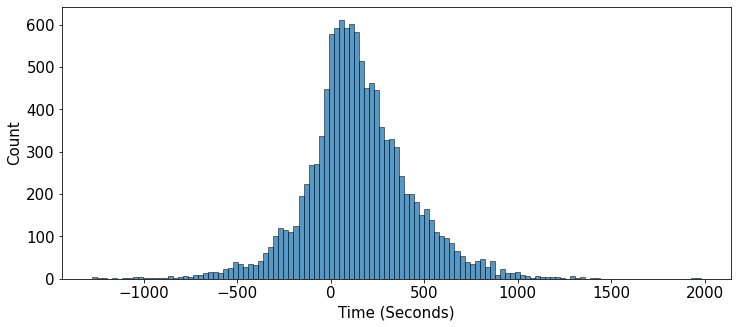

In [56]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(LT_46A_68_1['A_error'],kde = False)
plt.xlabel('Time (Seconds)')

plt.show()

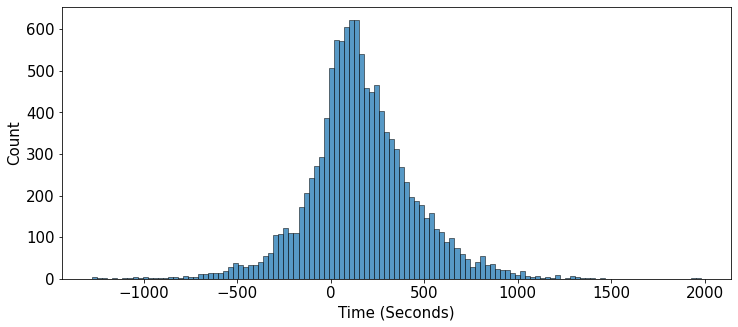

In [55]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(LT_46A_68_1['D_error'],kde = False)
plt.xlabel('Time (Seconds)')

plt.show()

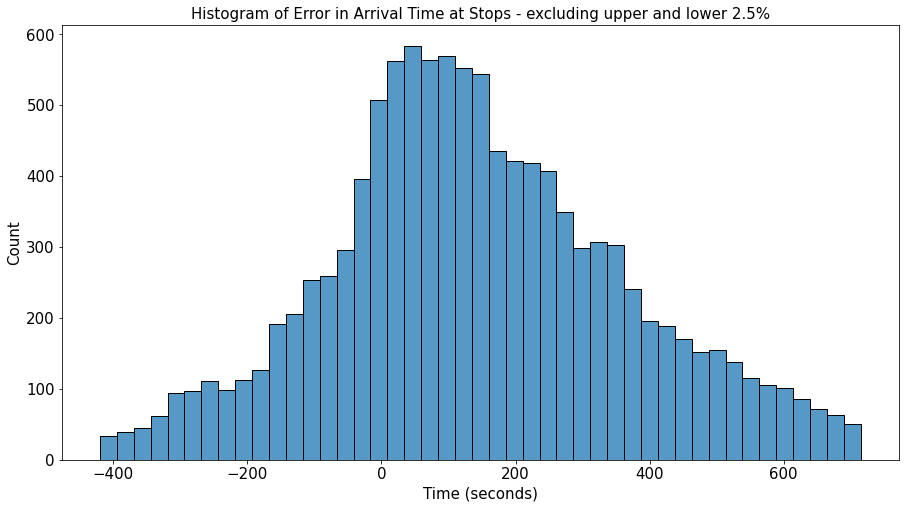

In [61]:
# calculate value 2 standard deviations above the mean
topTwoSDs = LT_46A_68_1['A_error'].mean() + (2*LT_46A_68_1['A_error'].std())
bottomTwoSDs = LT_46A_68_1['A_error'].mean() - (2*LT_46A_68_1['A_error'].std())
AE_NoOutliers = LT_46A_68_1.loc[LT_46A_68_1['A_error'] < topTwoSDs]
AE_NoOutliers = AE_NoOutliers.loc[LT_46A_68_1['A_error'] > bottomTwoSDs]



fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(AE_NoOutliers['A_error'],kde = False)
plt.xlabel('Time (seconds)')

plt.title('Histogram of Error in Arrival Time at Stops - excluding upper and lower 2.5%')
plt.show()

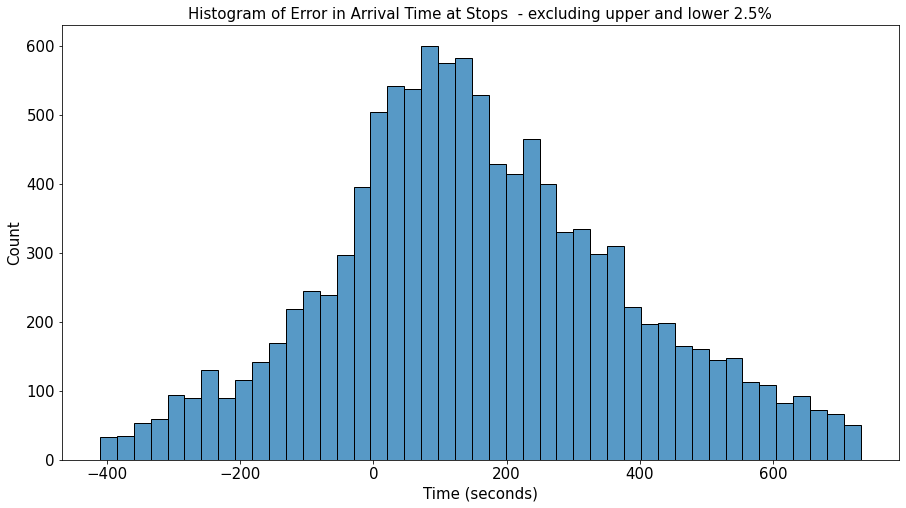

In [60]:
# calculate value 2 standard deviations above the mean
topTwoSDs = LT_46A_68_1['D_error'].mean() + (2*LT_46A_68_1['D_error'].std())
bottomTwoSDs = LT_46A_68_1['D_error'].mean() - (2*LT_46A_68_1['D_error'].std())
DE_NoOutliers = LT_46A_68_1.loc[LT_46A_68_1['D_error'] < topTwoSDs]
DE_NoOutliers = DE_NoOutliers.loc[LT_46A_68_1['D_error'] > bottomTwoSDs]



fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(DE_NoOutliers['D_error'],kde = False)
plt.xlabel('Time (seconds)')

plt.title('Histogram of Error in Arrival Time at Stops  - excluding upper and lower 2.5%')
plt.show()

In [64]:
std_DE_max = DE_NoOutliers['D_error'].max()
std_DE_min = DE_NoOutliers['D_error'].min()

print(std_DE_max)
print(std_DE_min)

731.0
-410.0


In [65]:
std_AE_max = AE_NoOutliers['A_error'].max()
std_AE_min = AE_NoOutliers['A_error'].min()

print(std_AE_max)
print(std_AE_min)

715.0
-420.0


In [66]:
LT_46A_68_1 = LT_46A_68_1[(LT_46A_68_1.D_error < std_DE_max) & (LT_46A_68_1.D_error > std_DE_min)]
LT_46A_68_1 = LT_46A_68_1[(LT_46A_68_1.A_error < std_AE_max) & (LT_46A_68_1.A_error > std_AE_min)]


In [72]:
print(LT_46A_68_1['A_error'].max())
print(LT_46A_68_1['A_error'].min())

print(LT_46A_68_1['D_error'].max())
print(LT_46A_68_1['D_error'].min())


714.0
-416.0
730.0
-409.0


In [ ]:
# perhaps leave in columns
# check it again tomorrow 
# need to talk with xing about the time thing